Data Information for ..\data\raw\DoctorsET.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        1 non-null      object
 1   id                       1 non-null      int64 
 2   peer_id                  1 non-null      object
 3   date                     1 non-null      object
 4   message                  1 non-null      object
 5   out                      1 non-null      bool  
 6   mentioned                1 non-null      bool  
 7   media_unread             1 non-null      bool  
 8   silent                   1 non-null      bool  
 9   post                     1 non-null      bool  
 10  from_scheduled           1 non-null      bool  
 11  legacy                   1 non-null      bool  
 12  edit_hide                1 non-null      bool  
 13  pinned                   1 non-null      bool  
 

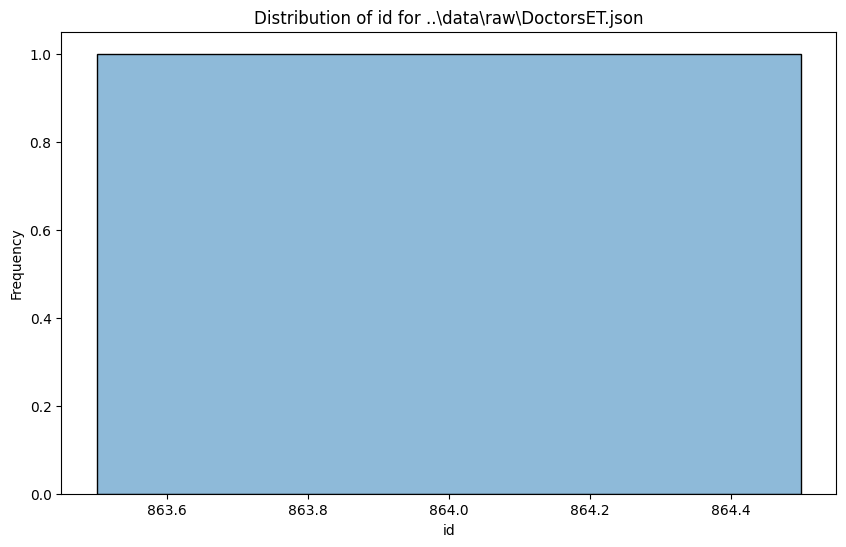

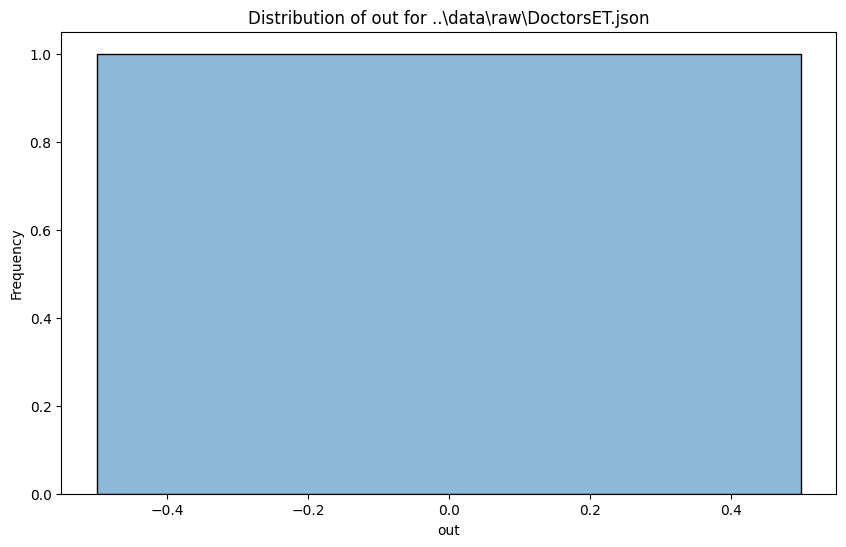

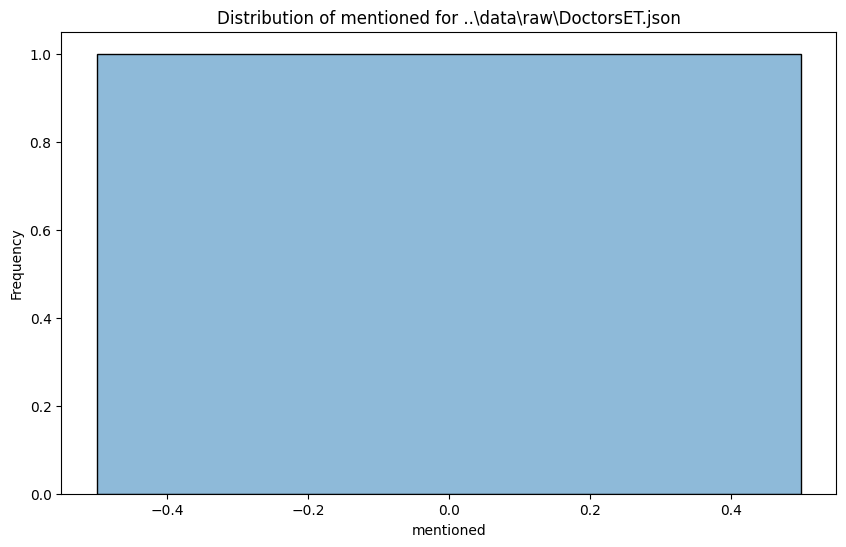

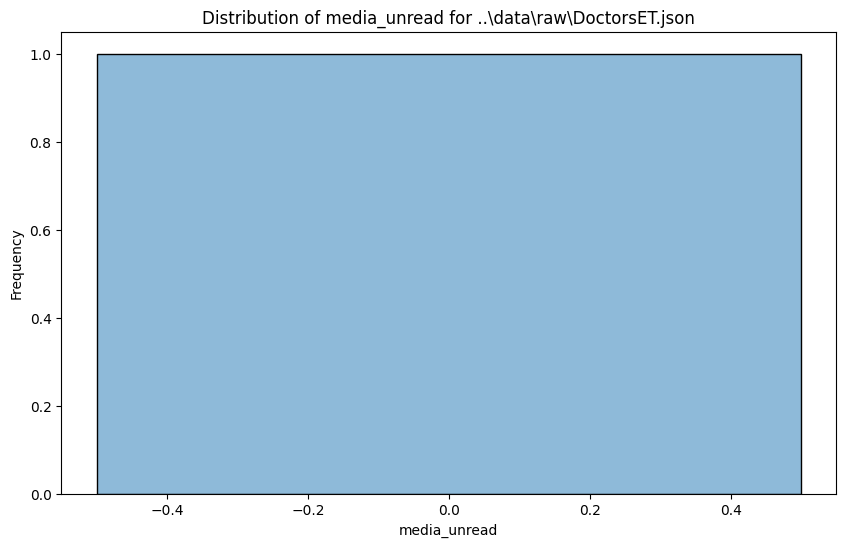

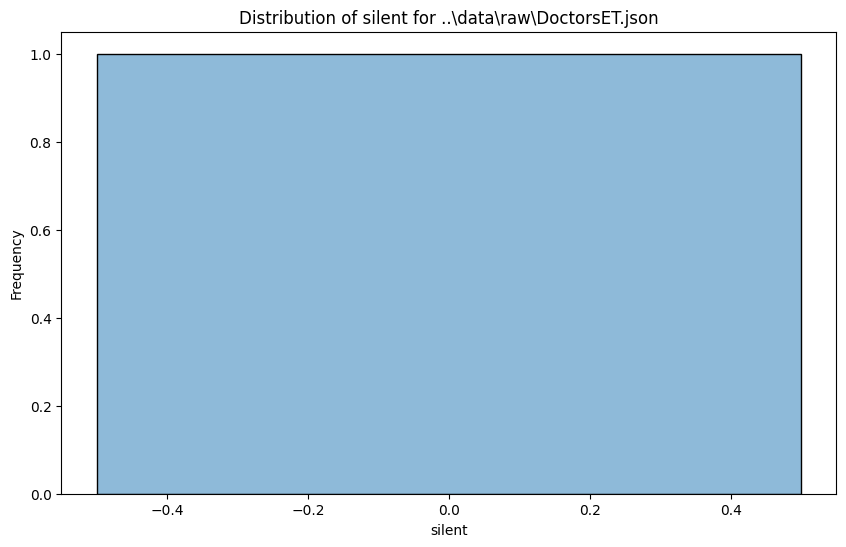

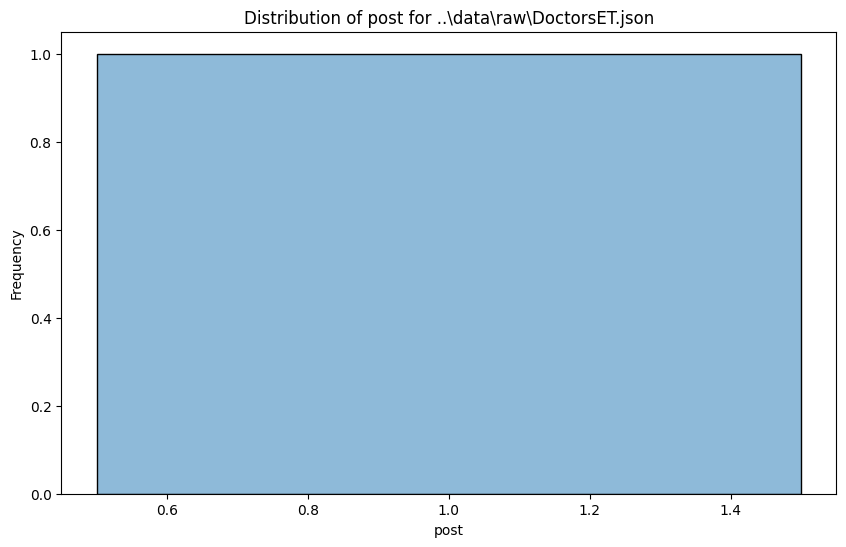

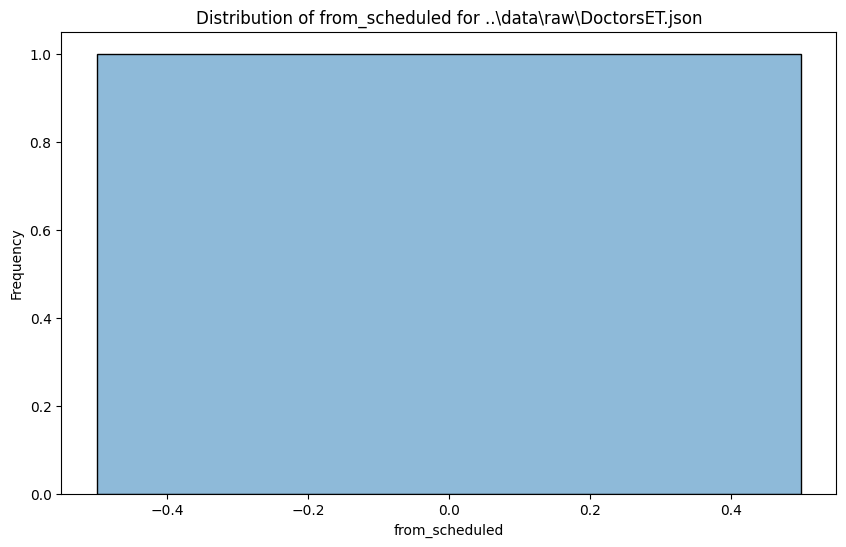

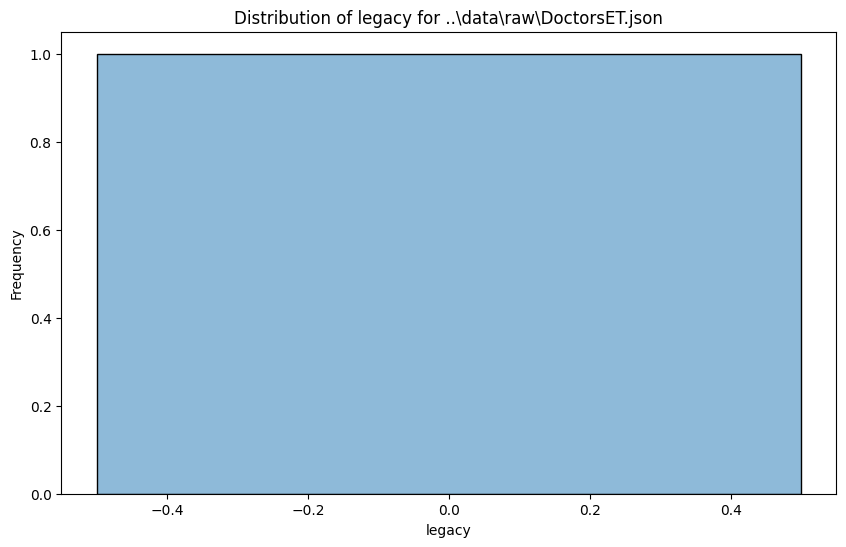

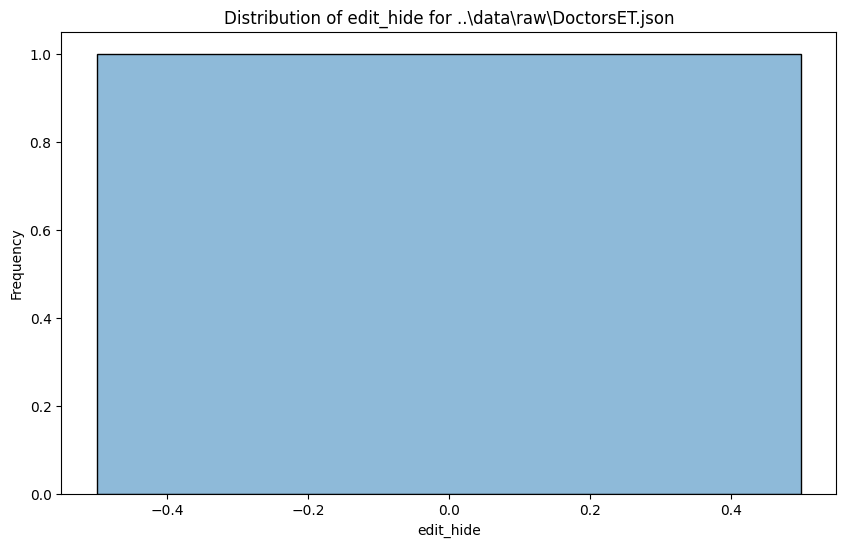

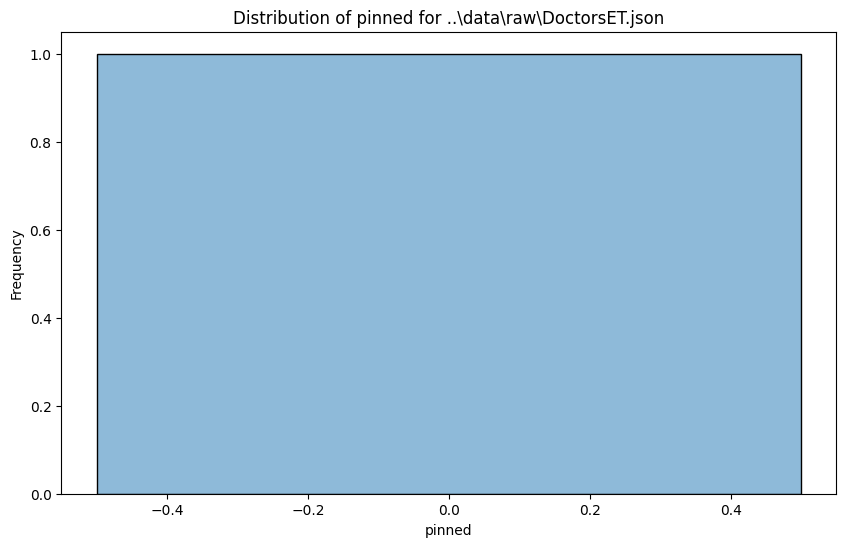

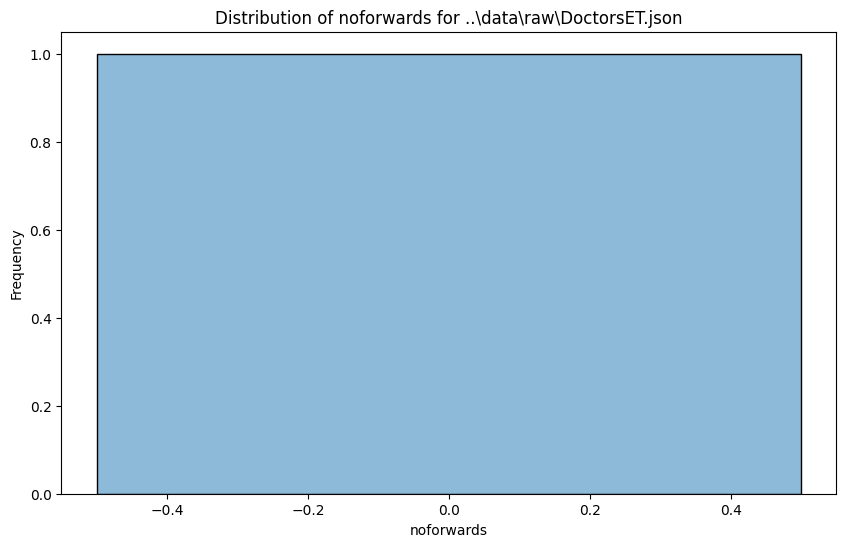

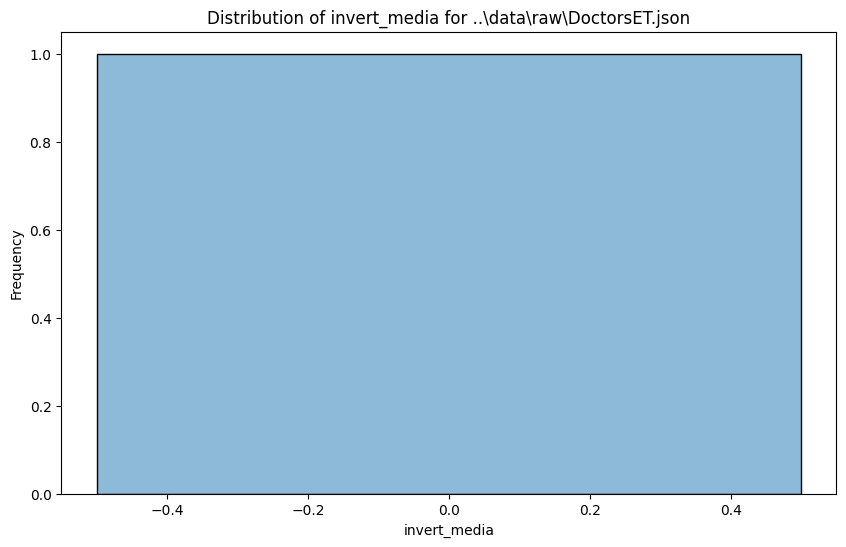

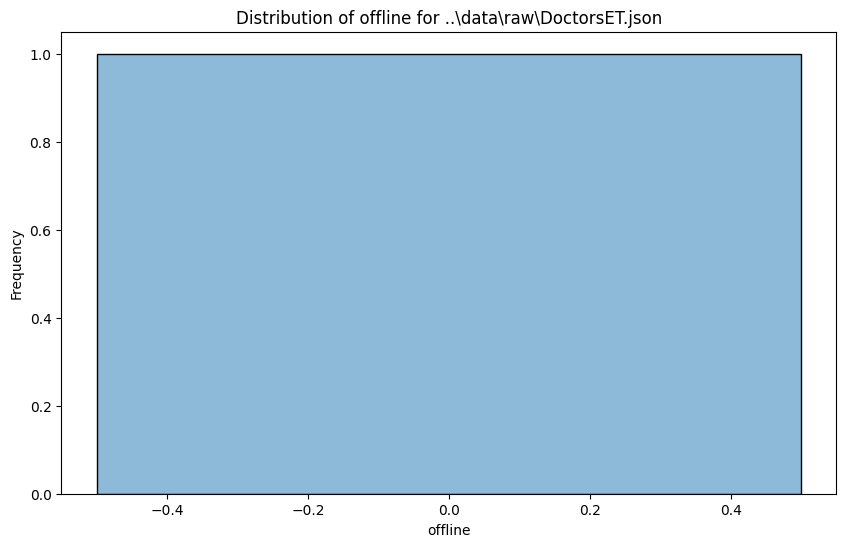

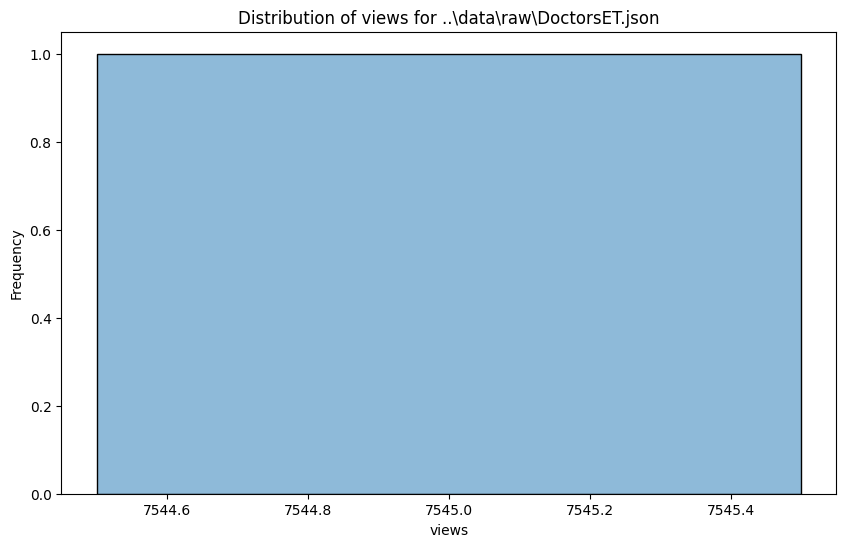

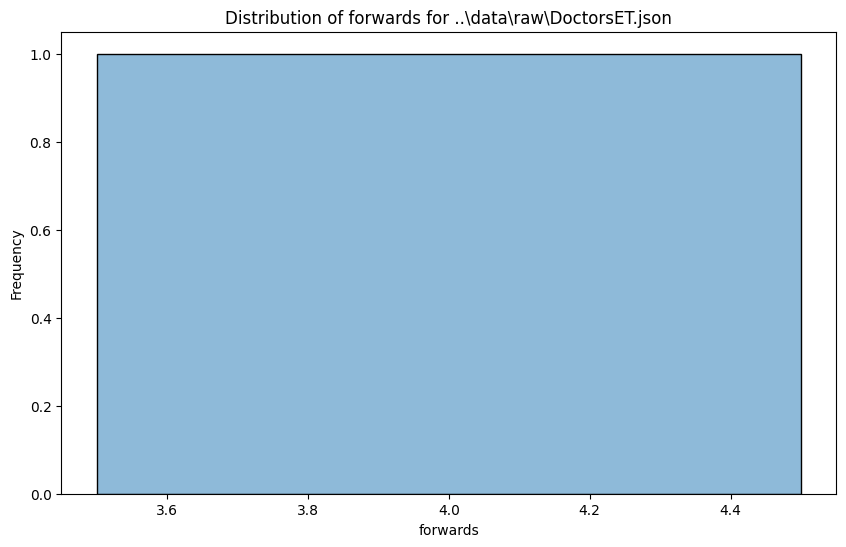

C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


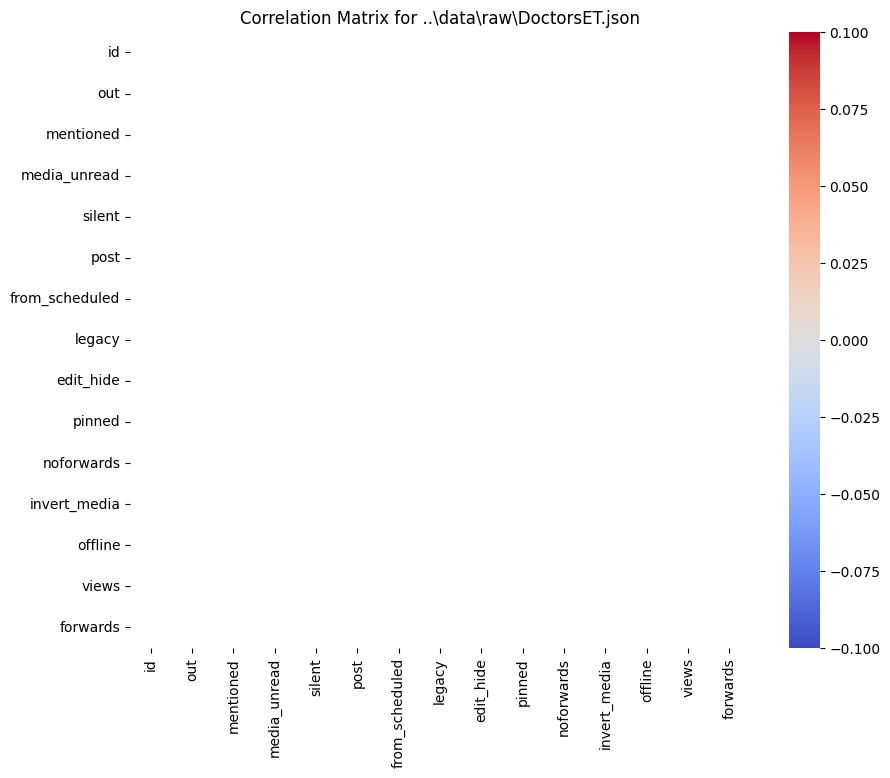

Column 'image' not found in the DataFrame.
Data Information for ..\data\raw\EAHCI.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        1 non-null      object
 1   id                       1 non-null      int64 
 2   peer_id                  1 non-null      object
 3   date                     1 non-null      object
 4   message                  1 non-null      object
 5   out                      1 non-null      bool  
 6   mentioned                1 non-null      bool  
 7   media_unread             1 non-null      bool  
 8   silent                   1 non-null      bool  
 9   post                     1 non-null      bool  
 10  from_scheduled           1 non-null      bool  
 11  legacy                   1 non-null      bool  
 12  edit_hide                1 non-null      bool  
 13  pinned    

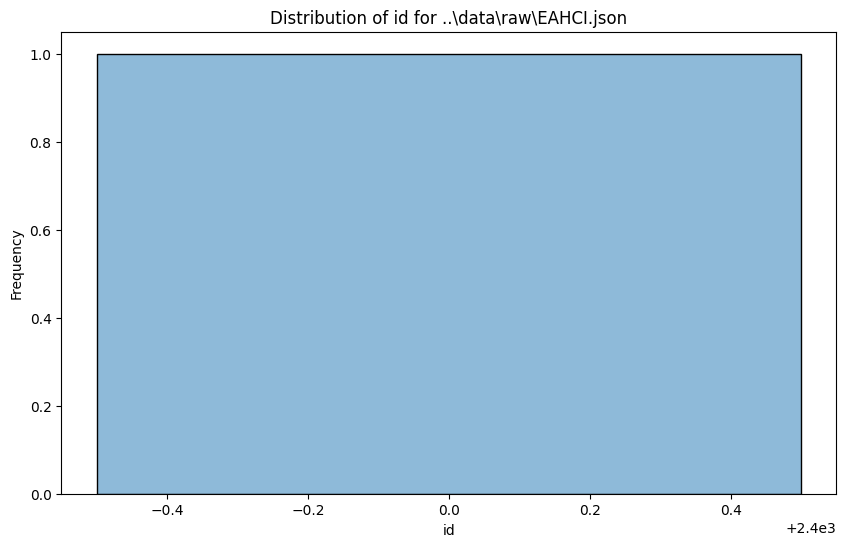

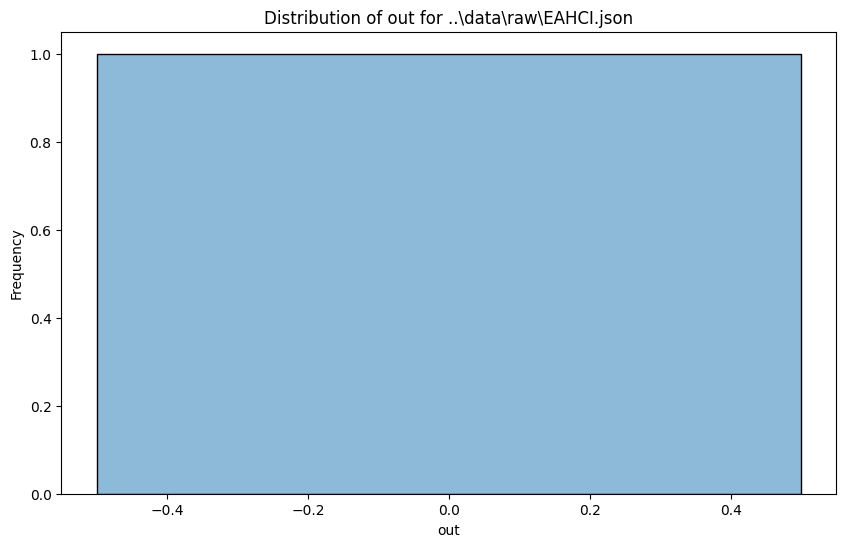

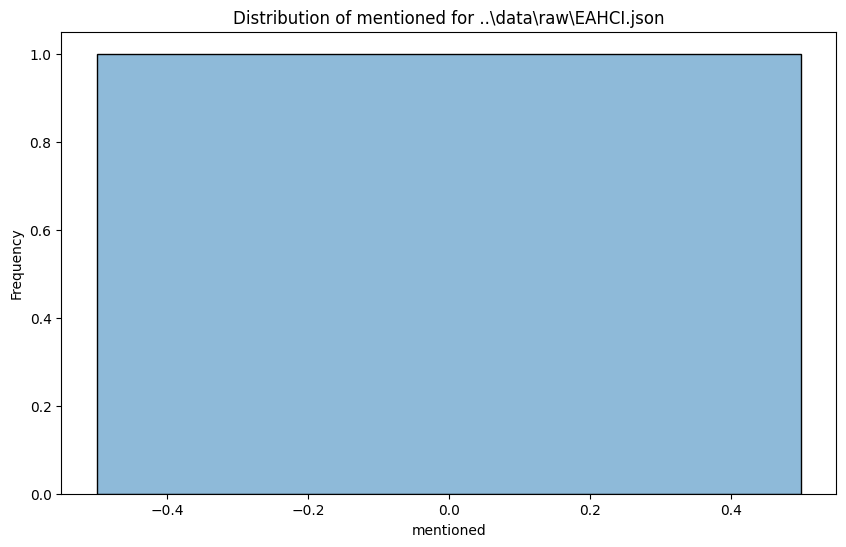

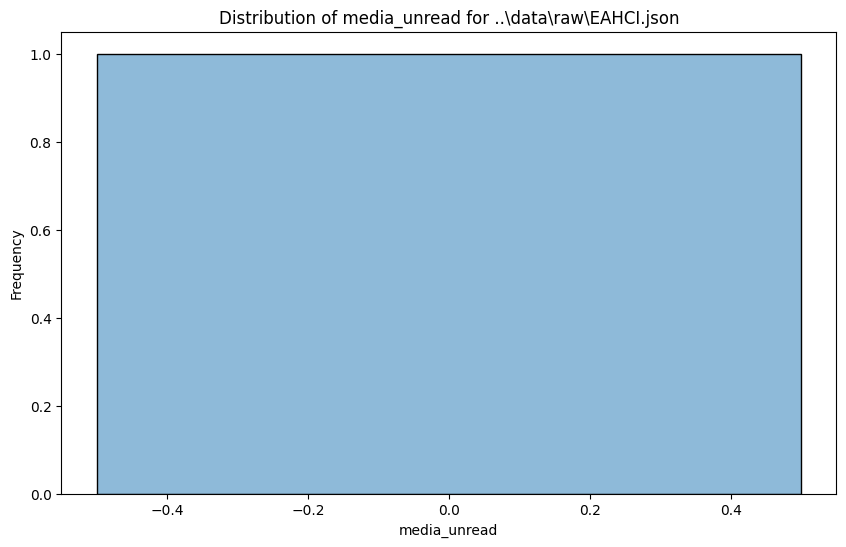

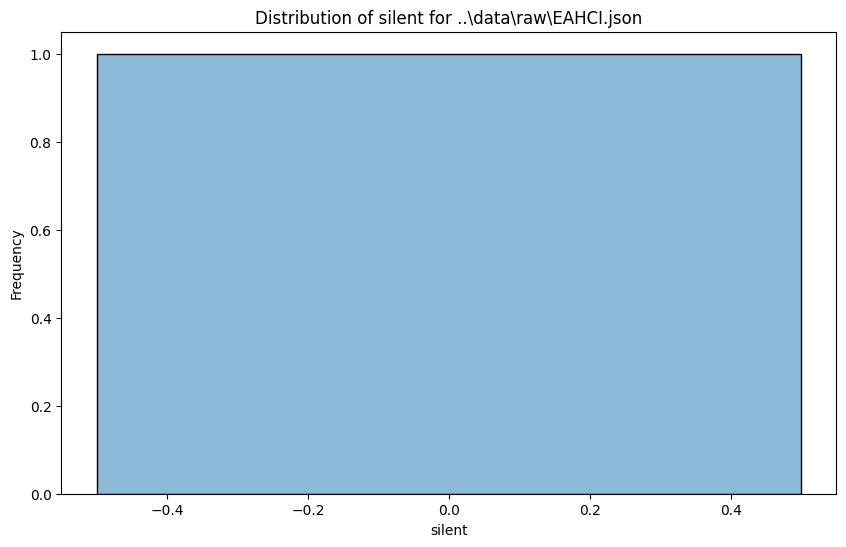

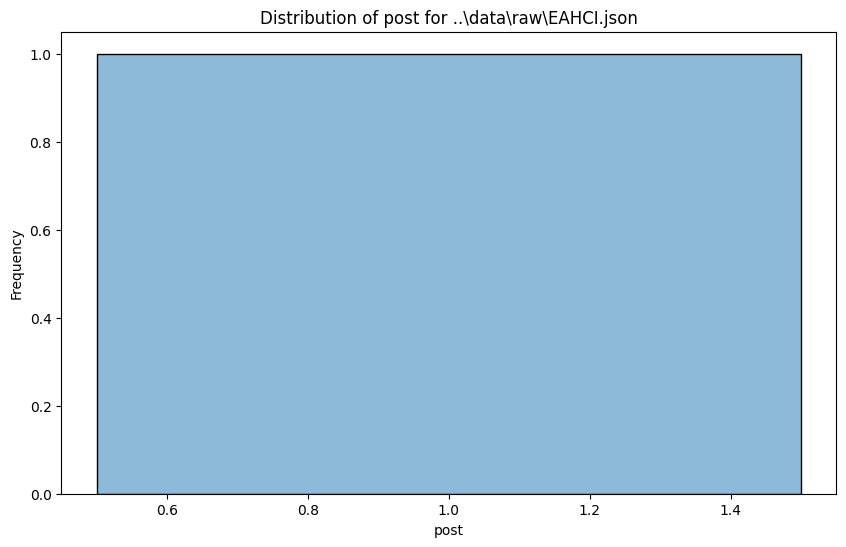

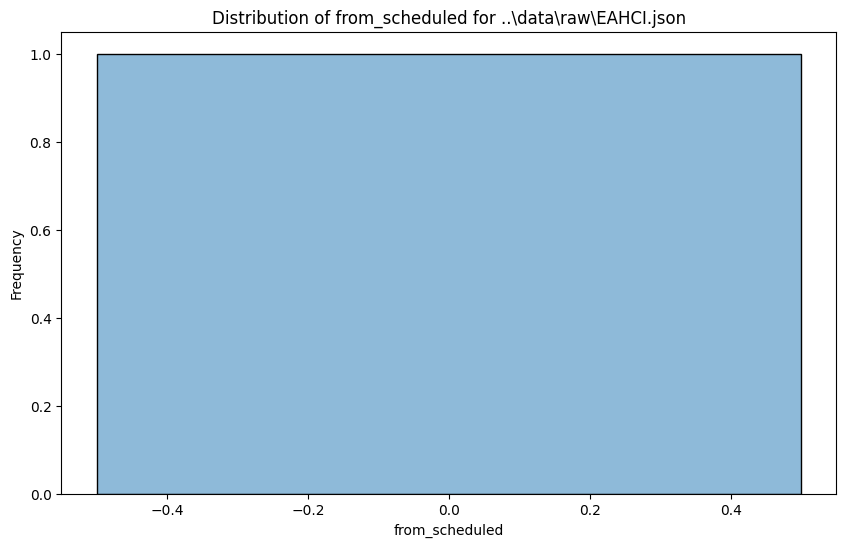

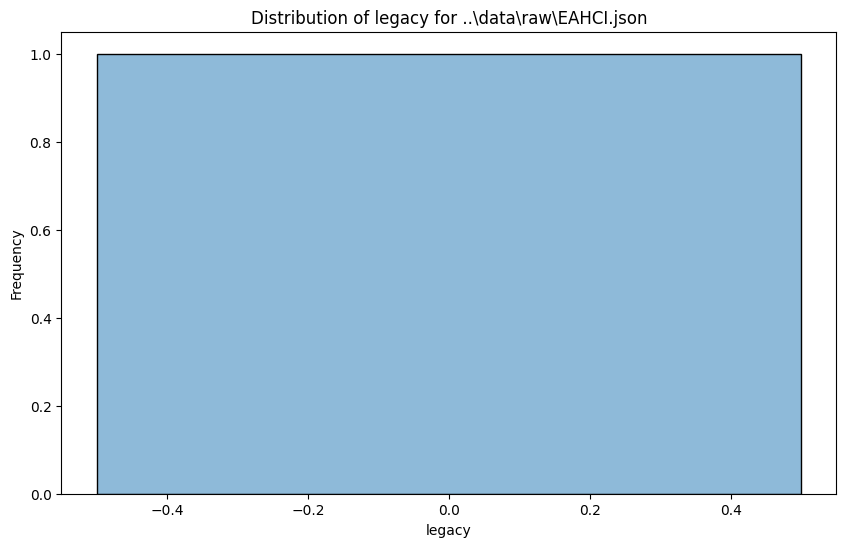

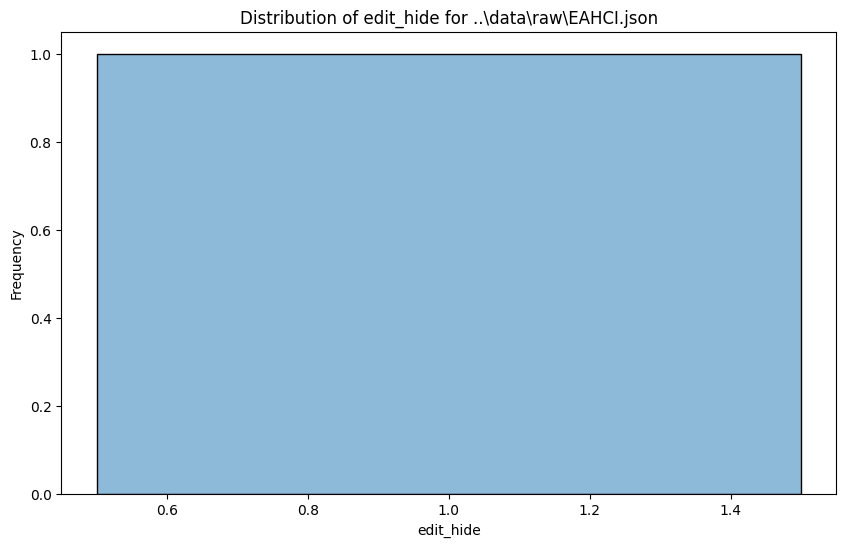

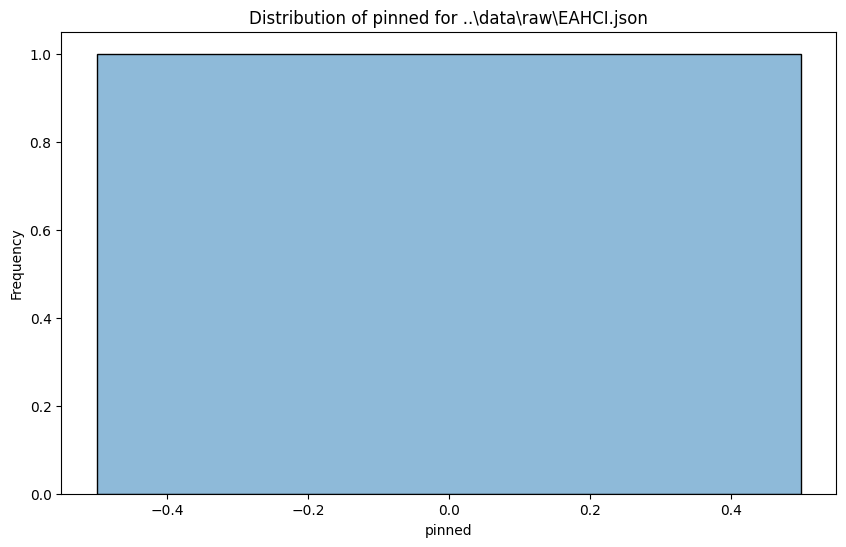

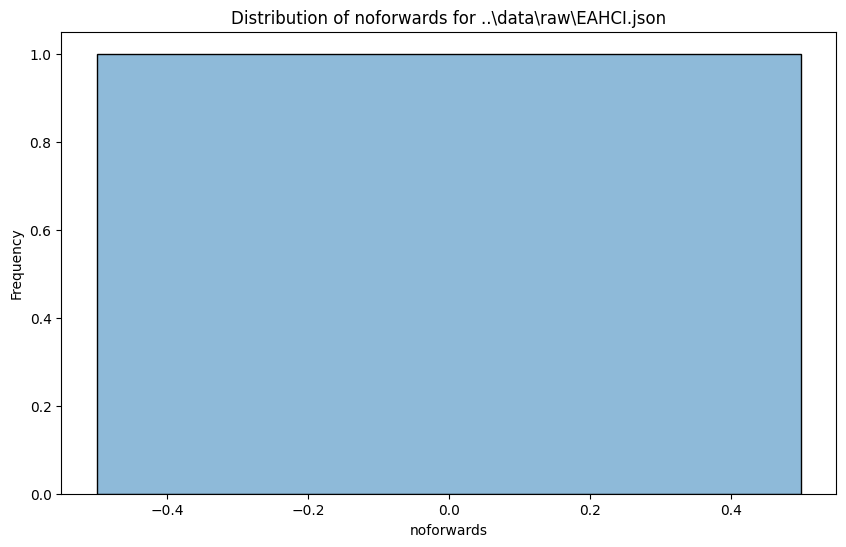

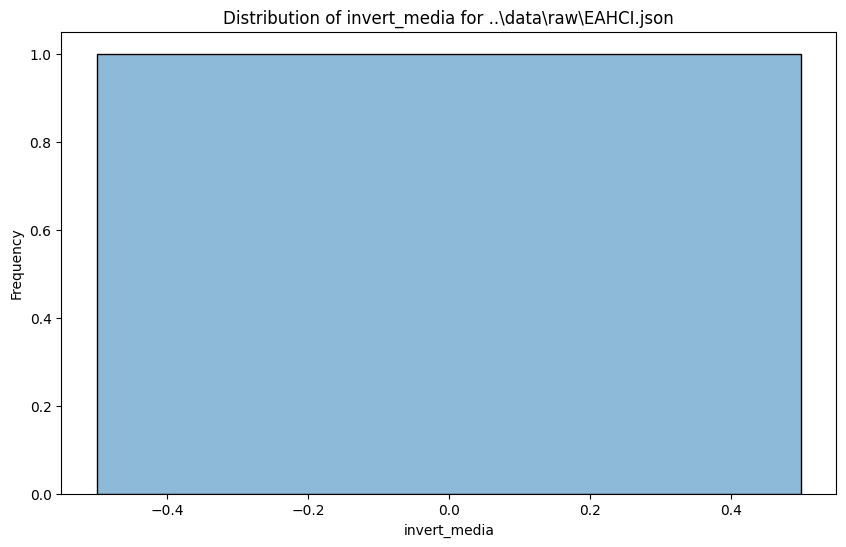

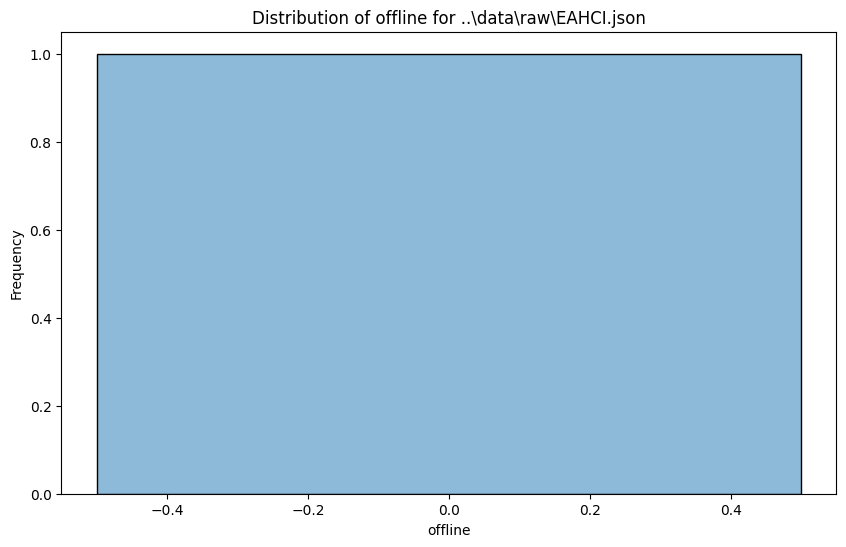

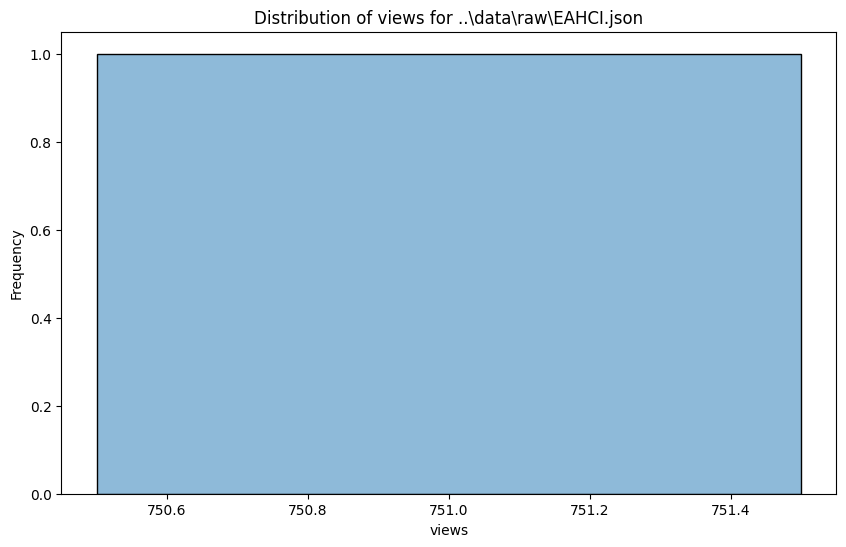

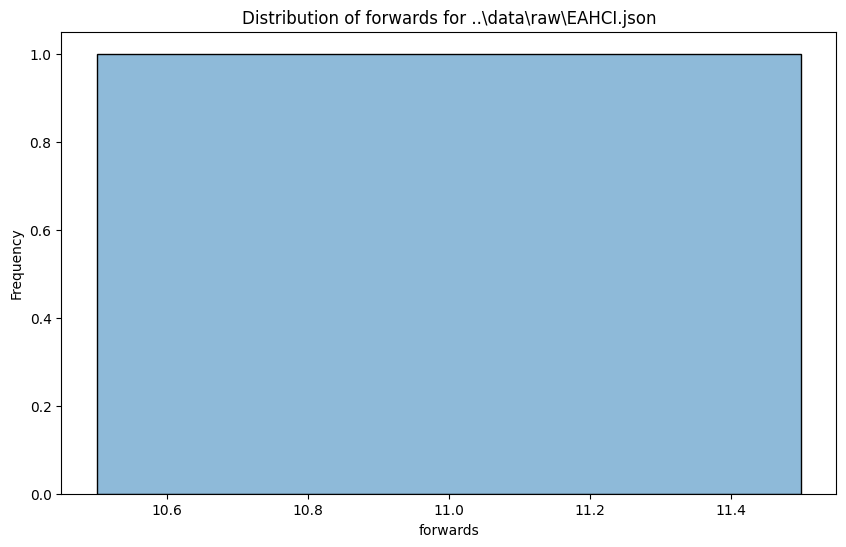

C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


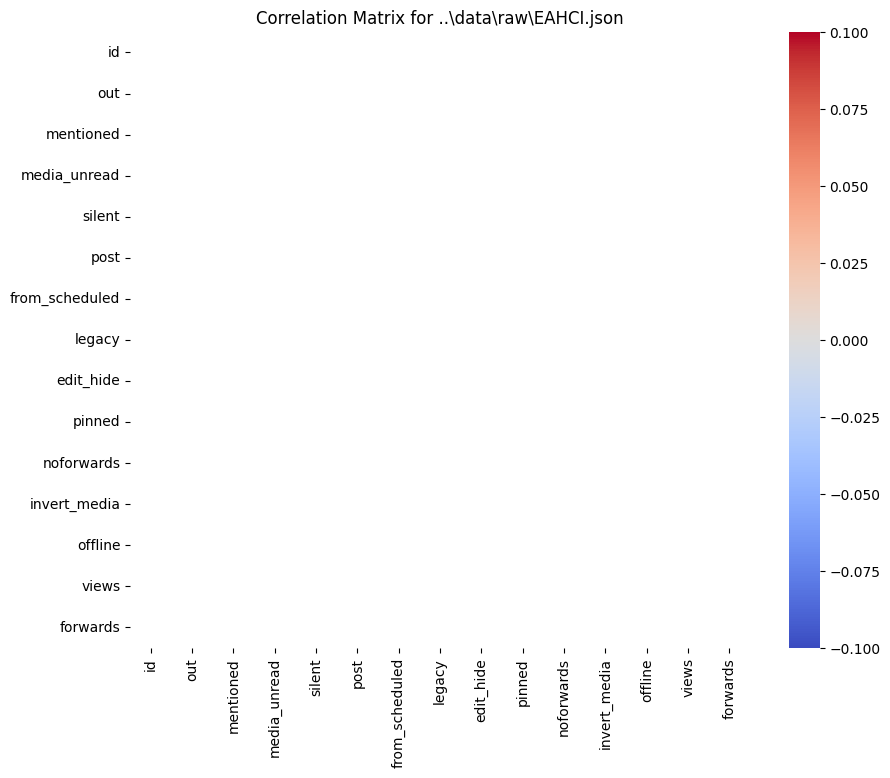

Column 'image' not found in the DataFrame.
Data Information for ..\data\raw\yetenaweg.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _             1 non-null      object
 1   id            1 non-null      int64 
 2   peer_id       1 non-null      object
 3   date          1 non-null      object
 4   action        1 non-null      object
 5   out           1 non-null      bool  
 6   mentioned     1 non-null      bool  
 7   media_unread  1 non-null      bool  
 8   silent        1 non-null      bool  
 9   post          1 non-null      bool  
 10  legacy        1 non-null      bool  
 11  from_id       0 non-null      object
 12  reply_to      0 non-null      object
 13  ttl_period    0 non-null      object
dtypes: bool(6), int64(1), object(7)
memory usage: 202.0+ bytes

Summary Statistics for ..\data\raw\yetenaweg.json :


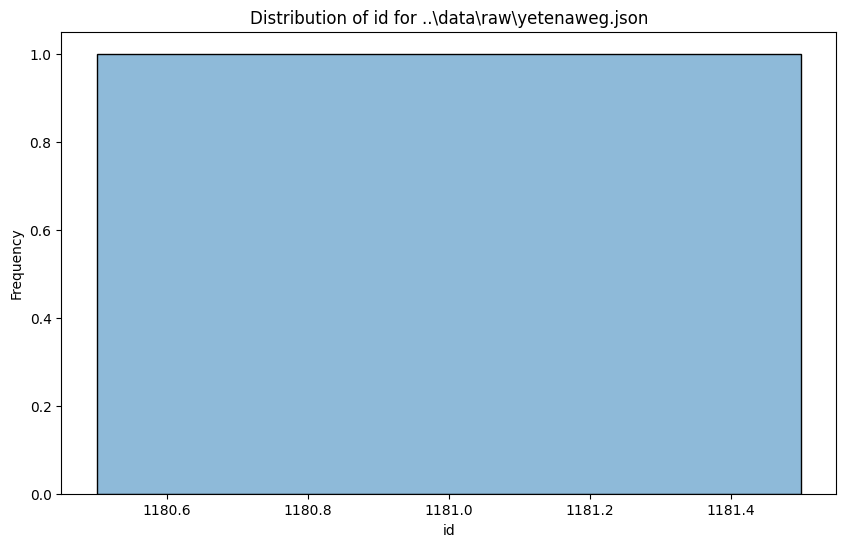

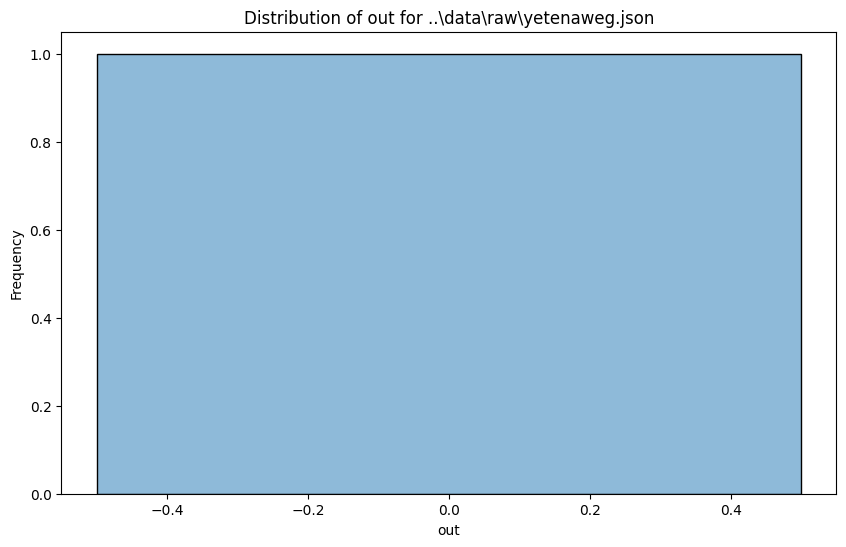

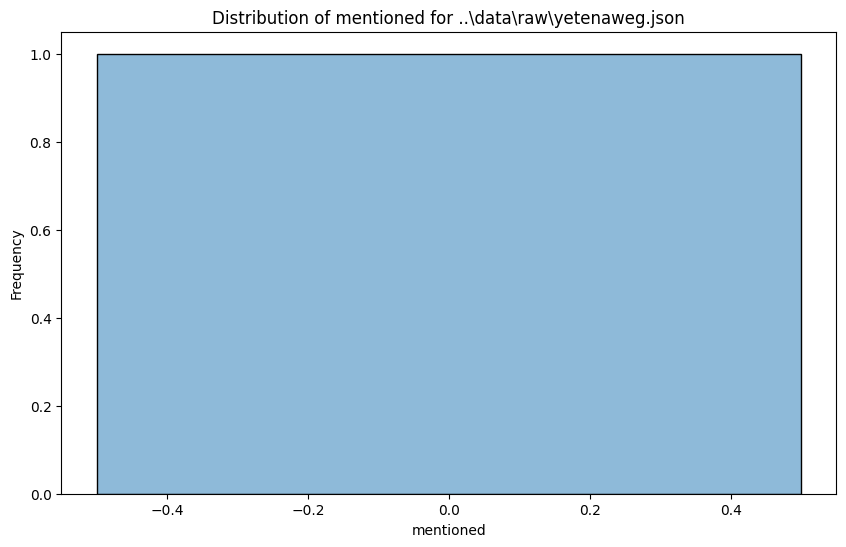

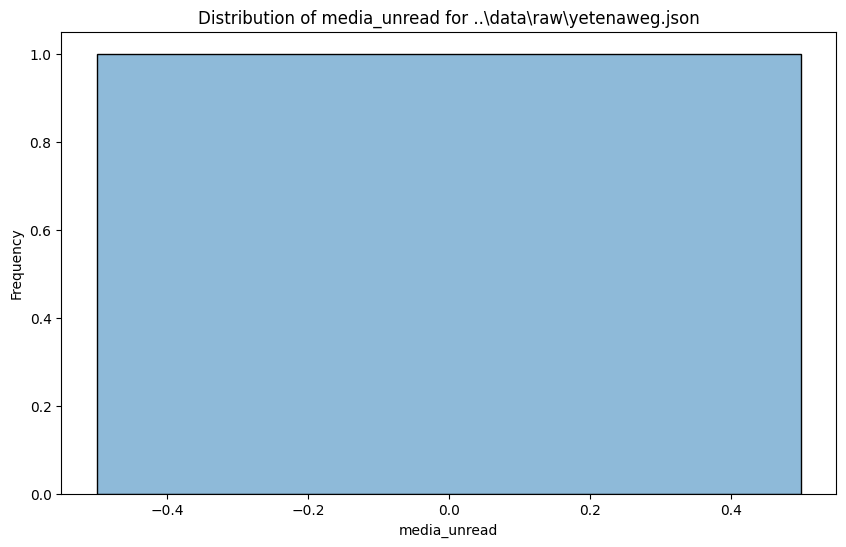

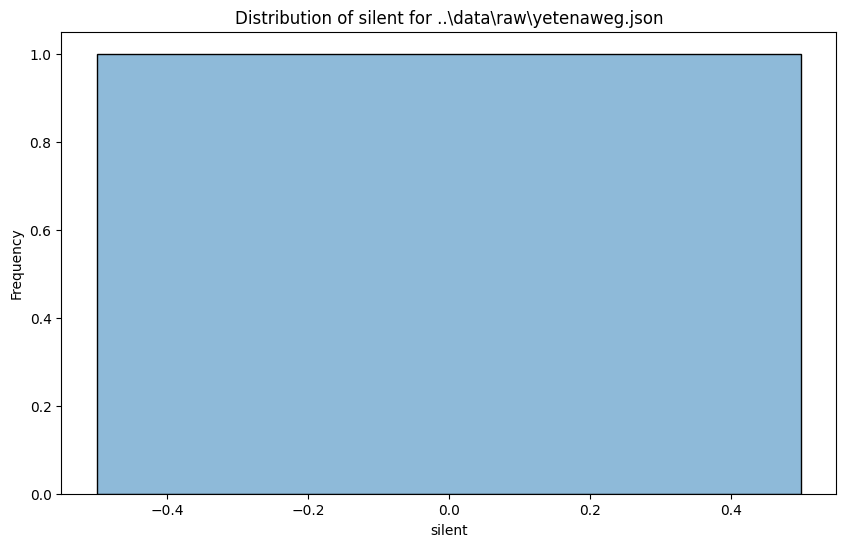

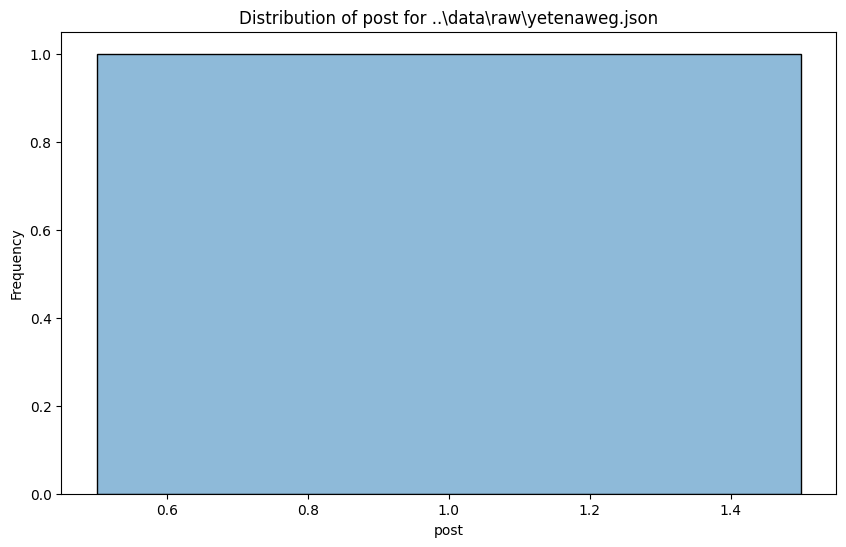

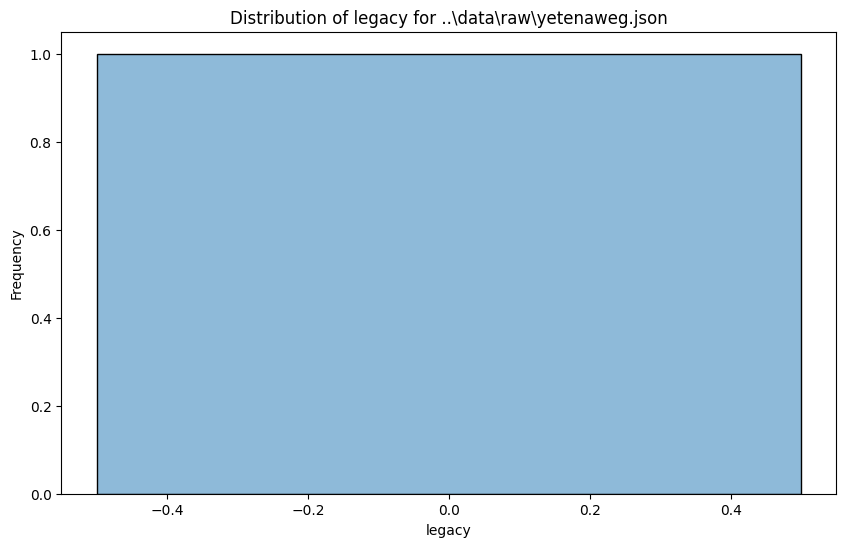

C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


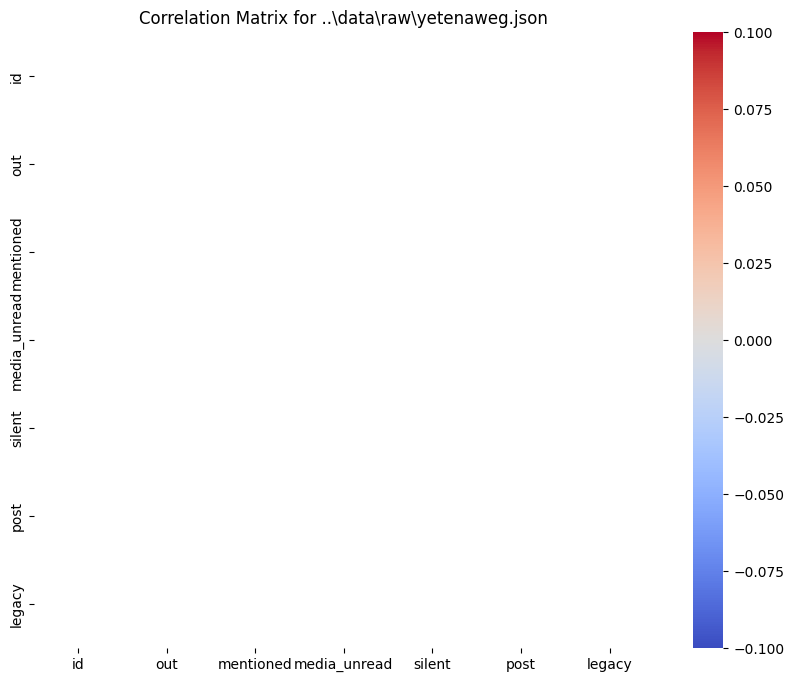

Column 'image' not found in the DataFrame.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import cv2
import os

# Function to perform EDA on a JSON file
def perform_eda(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Display basic information about the dataset
    print("Data Information for", json_file, ":")
    df.info()

    # Summary statistics
    print("\nSummary Statistics for", json_file, ":")
    df.describe()

    # Distribution of numerical variables
    num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col} for {json_file}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Correlation matrix for numerical variables only
    if len(num_cols) > 1:
        numerical_df = df[num_cols]
        plt.figure(figsize=(10, 8))
        sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix for ' + json_file)
        plt.show()
    else:
        print("Insufficient numerical columns for correlation analysis in", json_file)

    # Image analysis
    image_folder = 'image_folder'
    if 'image' in df.columns:
        sample_images = df['image'].sample(5).tolist()
        display_images(sample_images)
    else:
        print("Column 'image' not found in the DataFrame.")


# Function to display sample images
def display_images(images, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(min(num_images, len(images))):
        img = cv2.imread(os.path.join(image_folder, images[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, min(num_images, len(images)), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# List of JSON files
json_files = ['..\\data\\raw\\DoctorsET.json', '..\\data\\raw\\EAHCI.json', '..\\data\\raw\\yetenaweg.json']

# Perform EDA on each JSON file
for file in json_files:
    perform_eda(file)

<Figure size 1000x600 with 0 Axes>

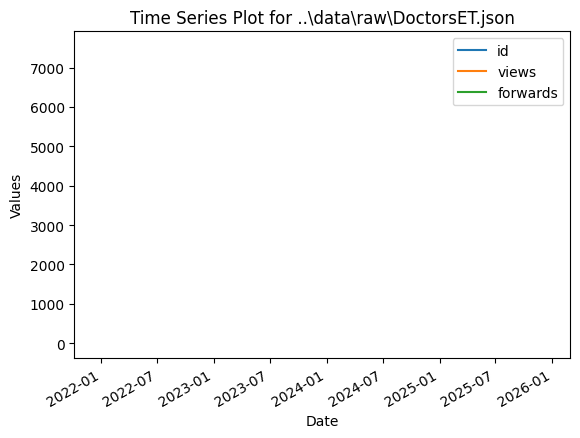

<Figure size 1000x600 with 0 Axes>

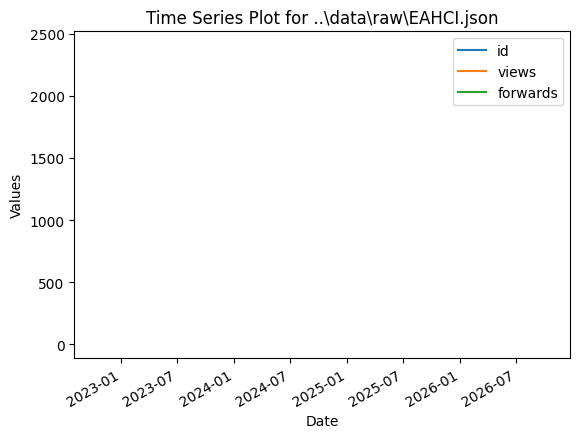

<Figure size 1000x600 with 0 Axes>

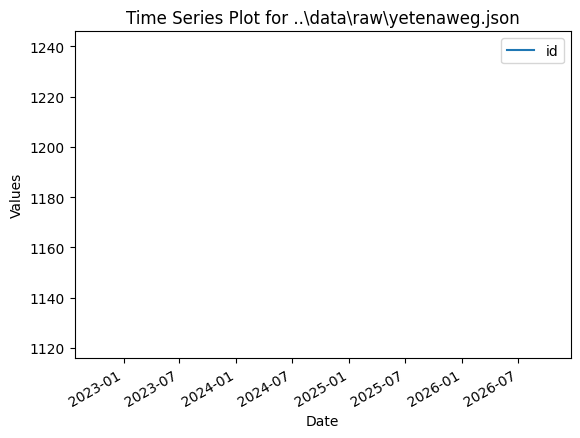

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import cv2
import os

# Function to perform time series analysis on a JSON file
def perform_time_series_analysis(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Convert 'date' column to datetime type if it exists
    if 'date' in df.columns:
        try:
            # Convert date column to datetime format
            df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S%z')  # Specify the correct format
        except ValueError:
            print("Error converting date column to datetime in", json_file)
            return

        # Set 'date' column as the index
        df.set_index('date', inplace=True)

        # Time series plot
        plt.figure(figsize=(10, 6))
        df.plot()
        plt.title('Time Series Plot for ' + json_file)
        plt.xlabel('Date')
        plt.ylabel('Values')
        plt.show()
    else:
        print("No 'date' column found in the DataFrame for", json_file)

# List of JSON files
json_files = ['..\\data\\raw\\DoctorsET.json', 
              '..\\data\\raw\\EAHCI.json', 
              '..\\data\\raw\\yetenaweg.json'
              ]

# Perform time series analysis on each JSON file
for file in json_files:
    perform_time_series_analysis(file)

Data Information for ..\data\raw\DoctorsET.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        1 non-null      object
 1   id                       1 non-null      int64 
 2   peer_id                  1 non-null      object
 3   date                     1 non-null      object
 4   message                  1 non-null      object
 5   out                      1 non-null      bool  
 6   mentioned                1 non-null      bool  
 7   media_unread             1 non-null      bool  
 8   silent                   1 non-null      bool  
 9   post                     1 non-null      bool  
 10  from_scheduled           1 non-null      bool  
 11  legacy                   1 non-null      bool  
 12  edit_hide                1 non-null      bool  
 13  pinned                   1 non-null      bool  
 

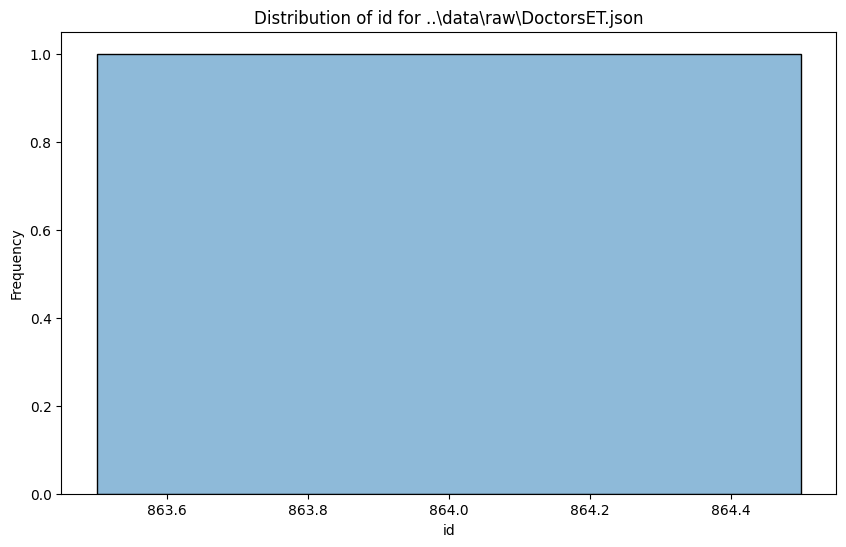

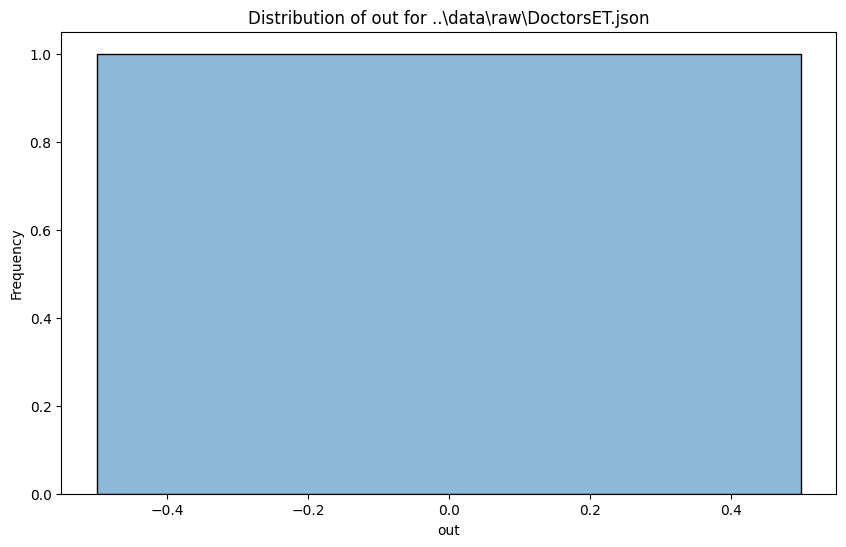

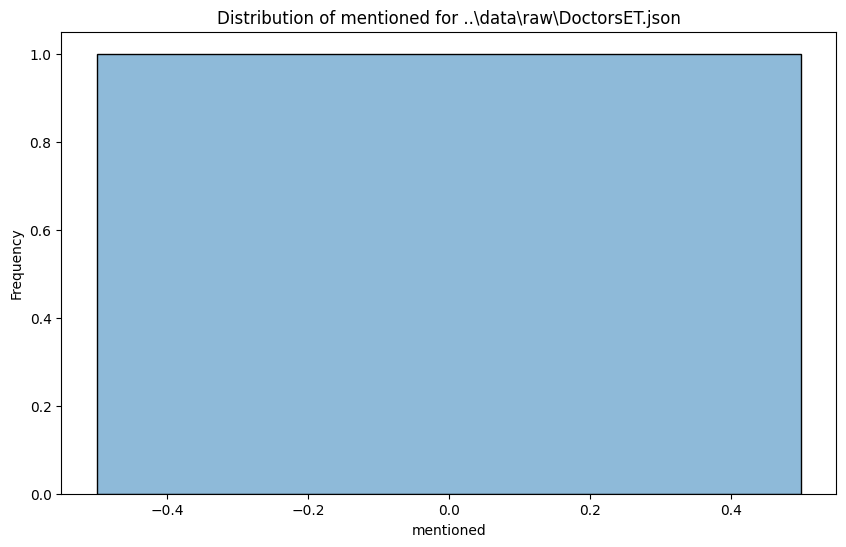

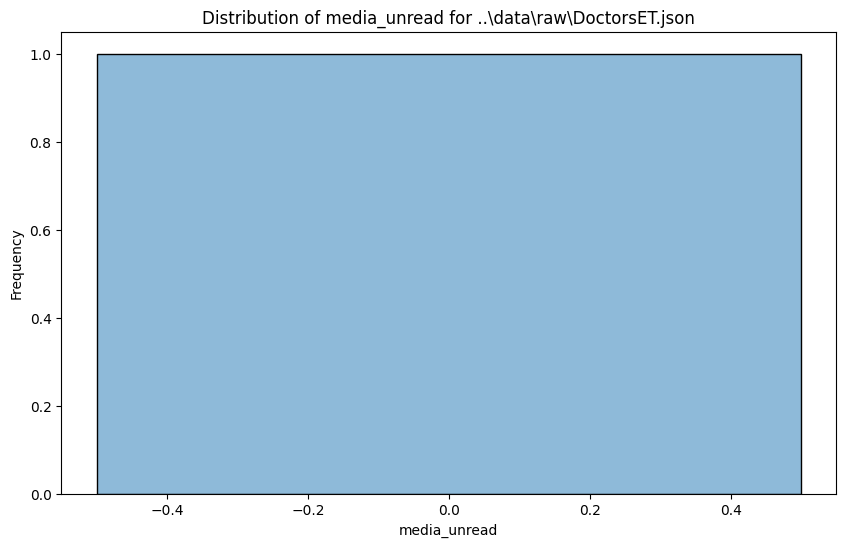

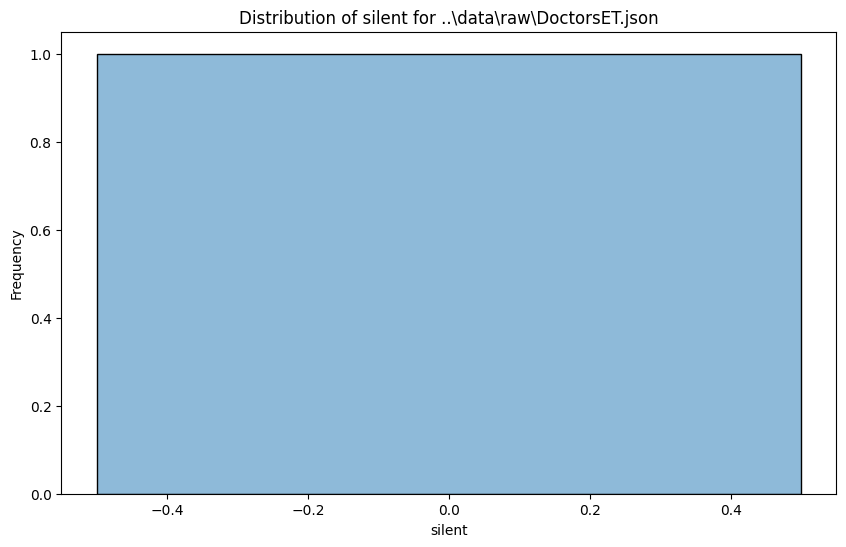

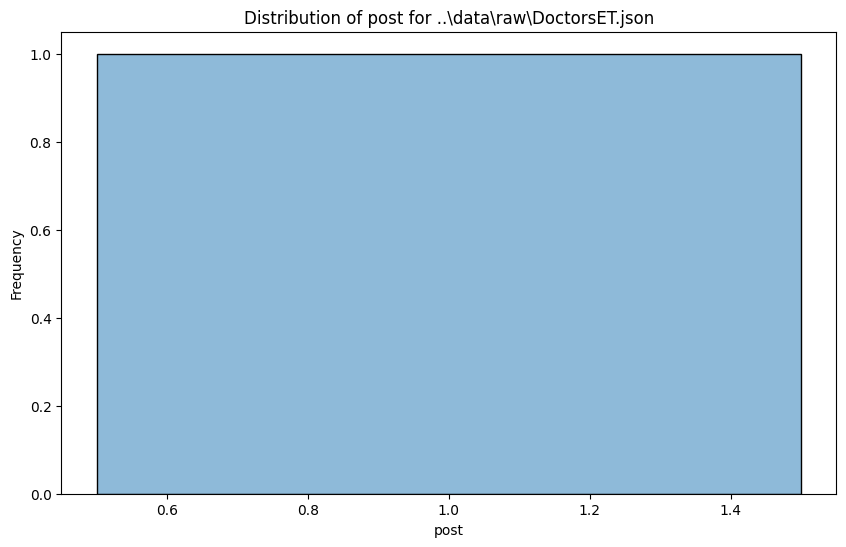

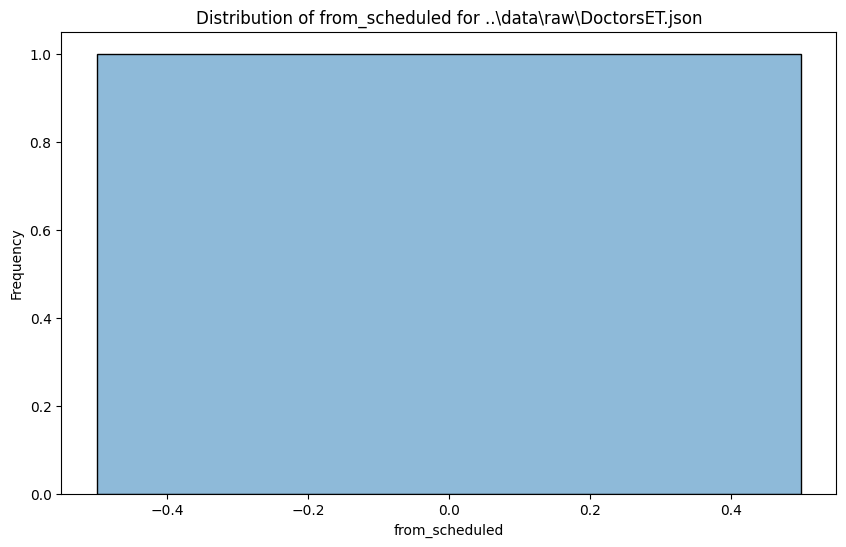

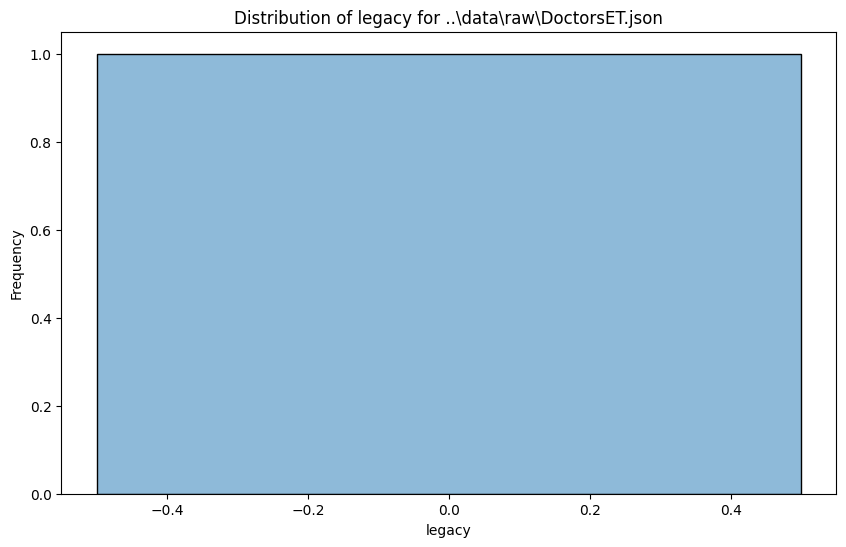

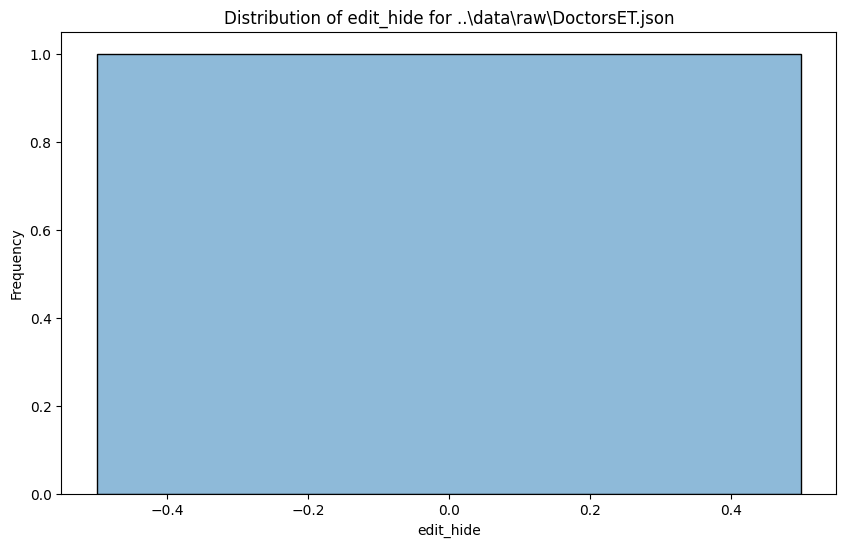

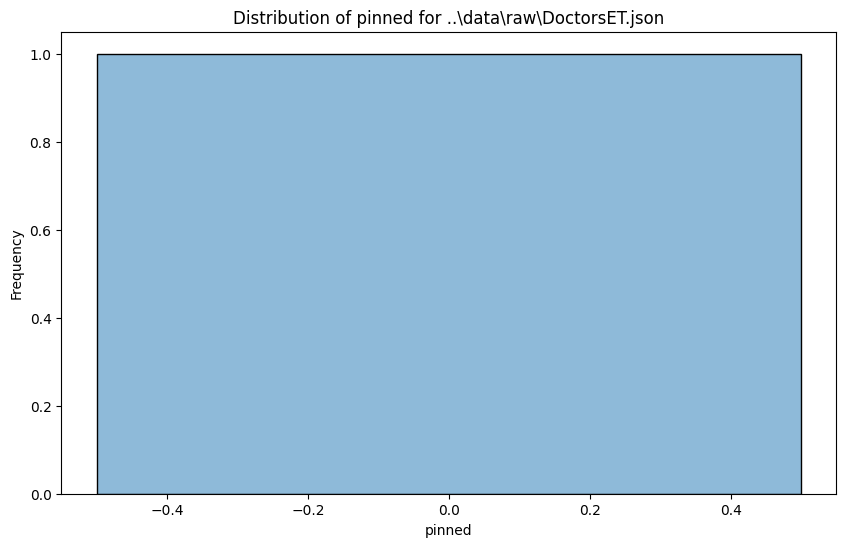

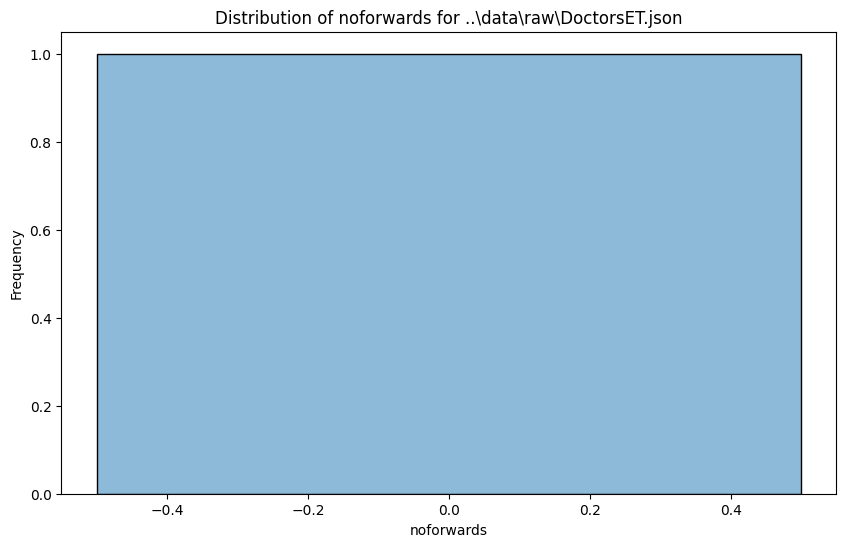

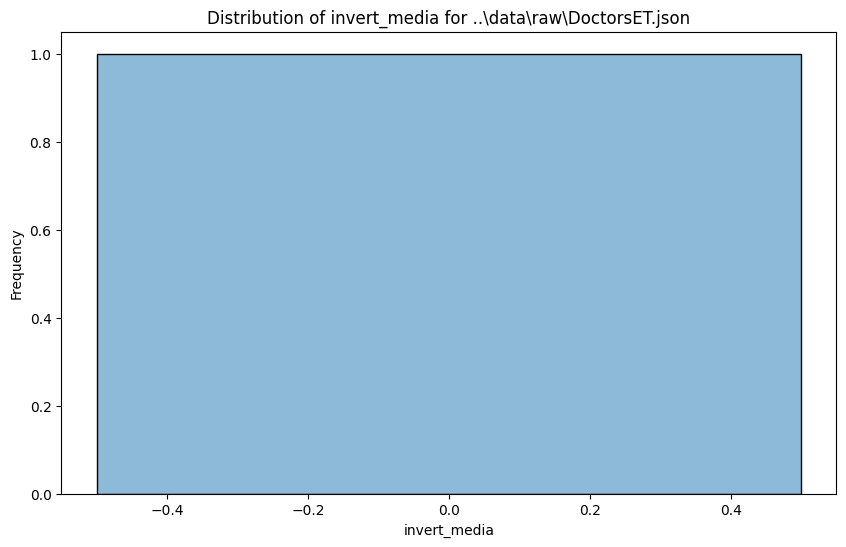

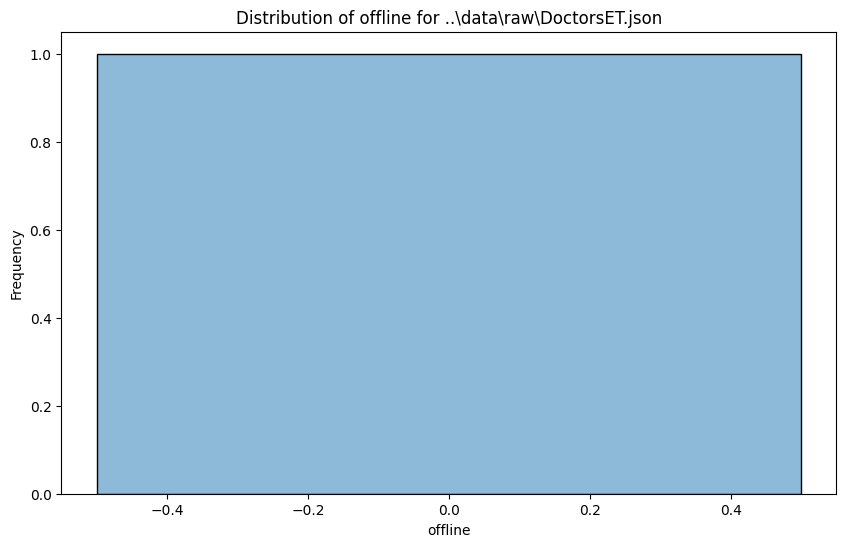

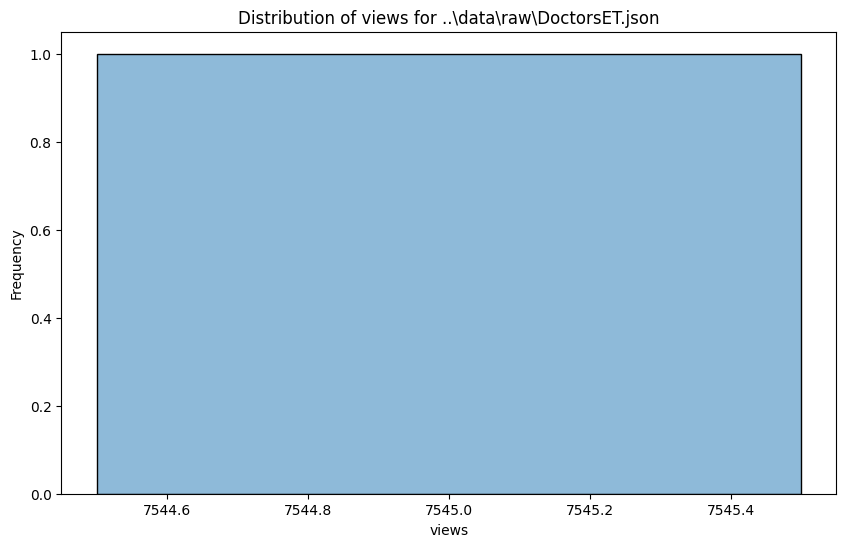

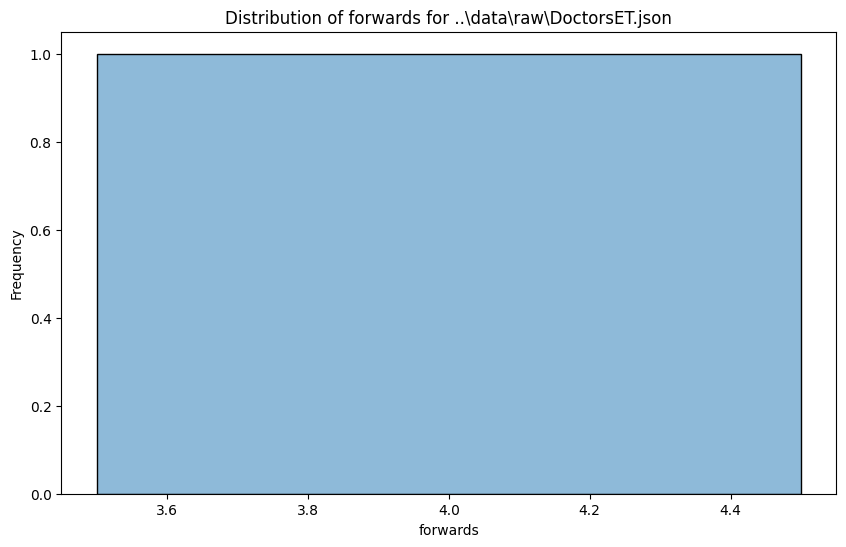

C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


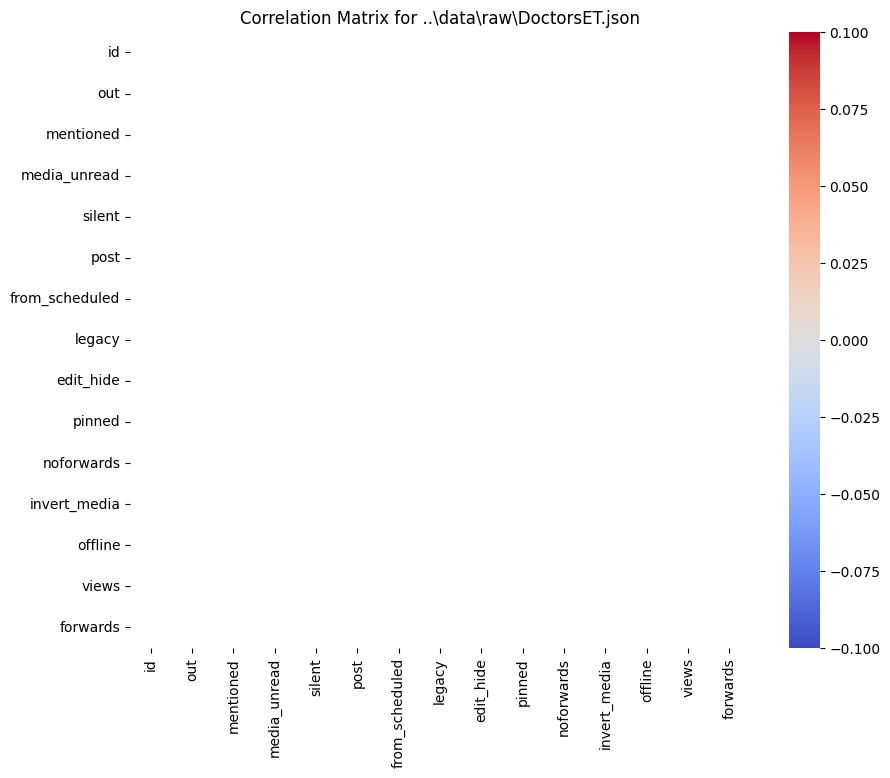

Data Information for ..\data\raw\EAHCI.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        1 non-null      object
 1   id                       1 non-null      int64 
 2   peer_id                  1 non-null      object
 3   date                     1 non-null      object
 4   message                  1 non-null      object
 5   out                      1 non-null      bool  
 6   mentioned                1 non-null      bool  
 7   media_unread             1 non-null      bool  
 8   silent                   1 non-null      bool  
 9   post                     1 non-null      bool  
 10  from_scheduled           1 non-null      bool  
 11  legacy                   1 non-null      bool  
 12  edit_hide                1 non-null      bool  
 13  pinned                   1 non-null      bool  
 14  

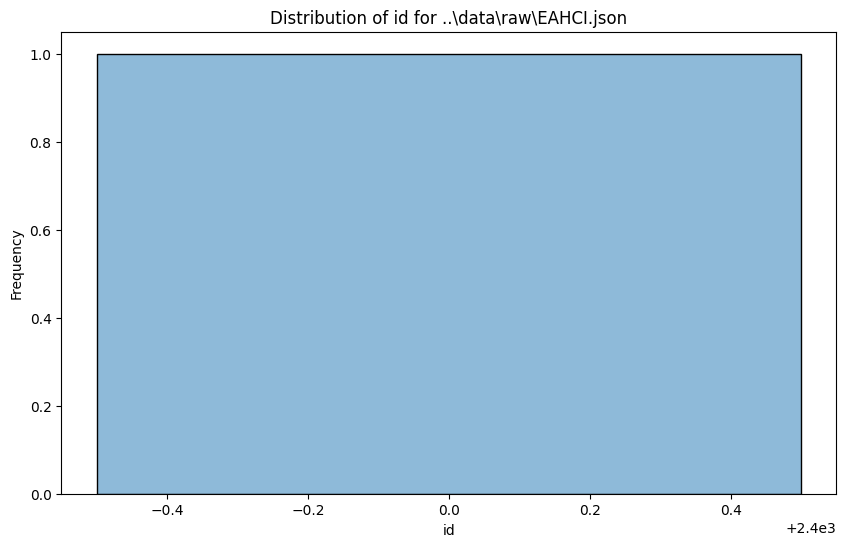

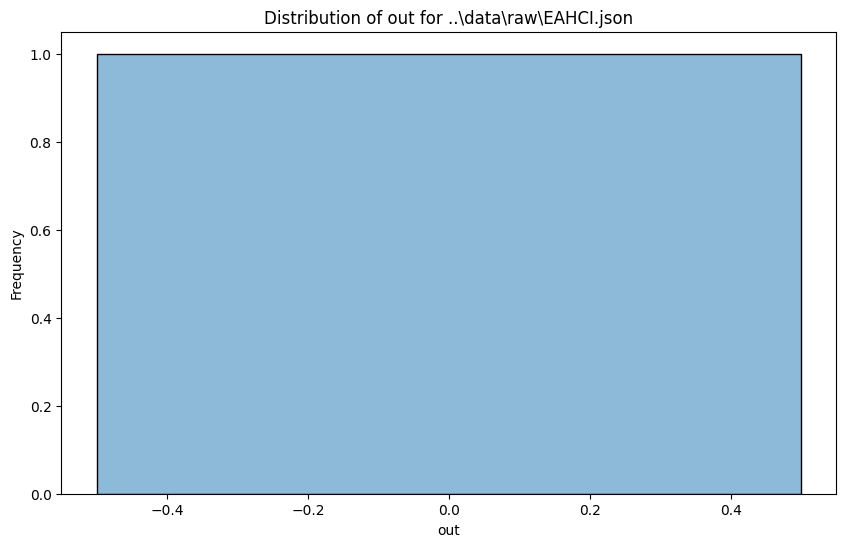

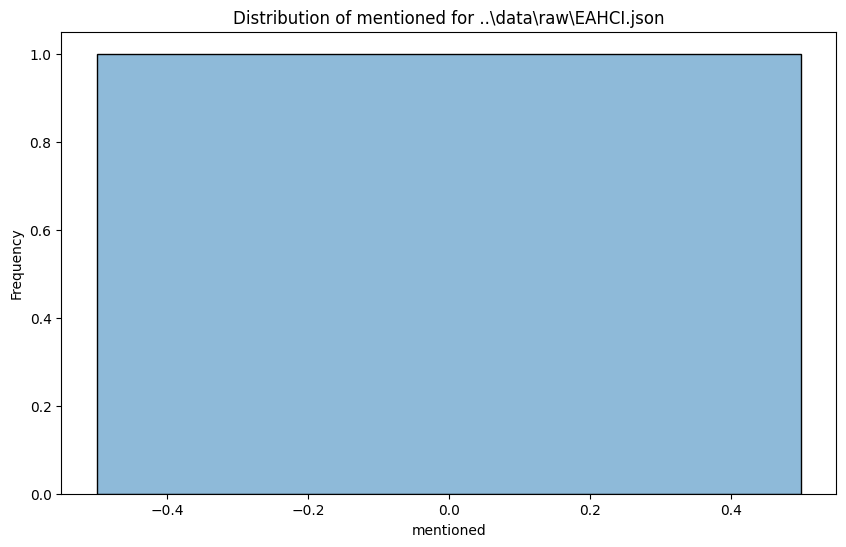

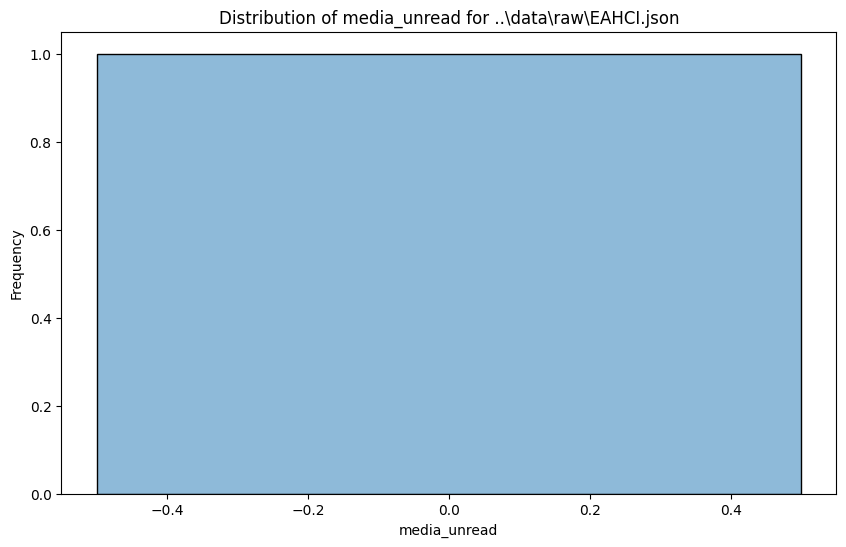

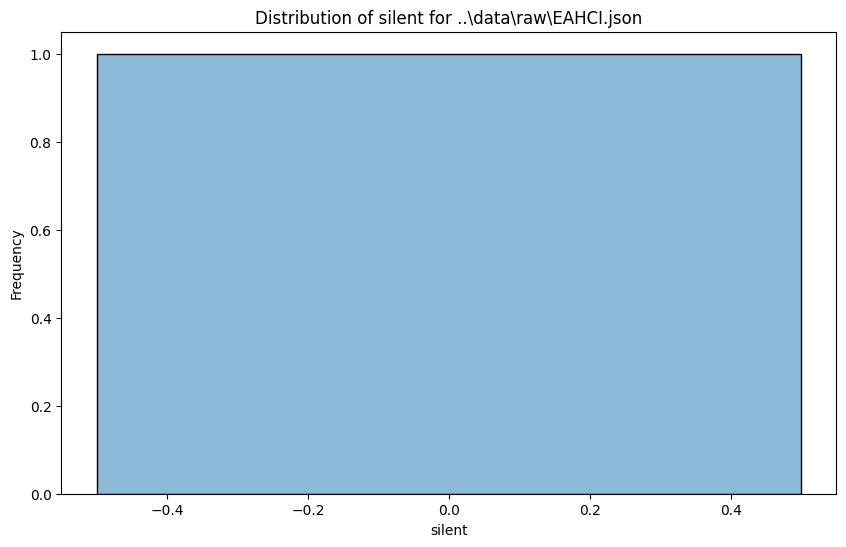

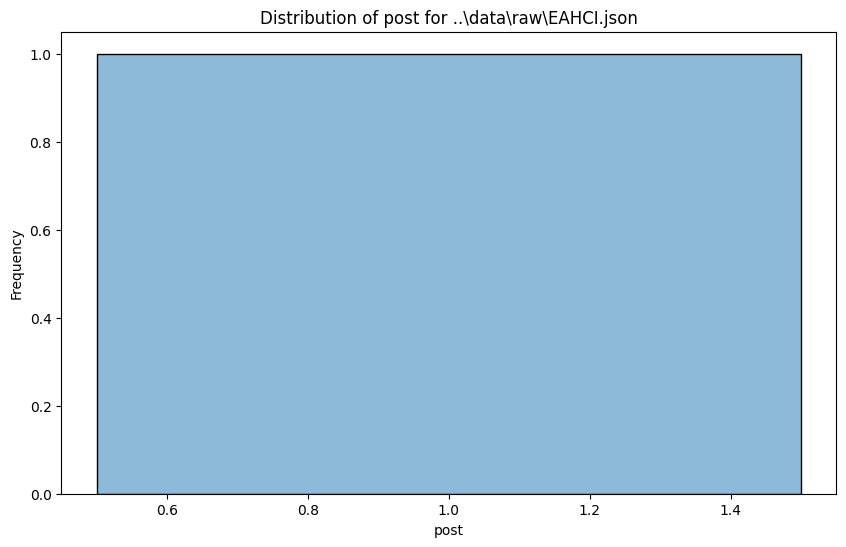

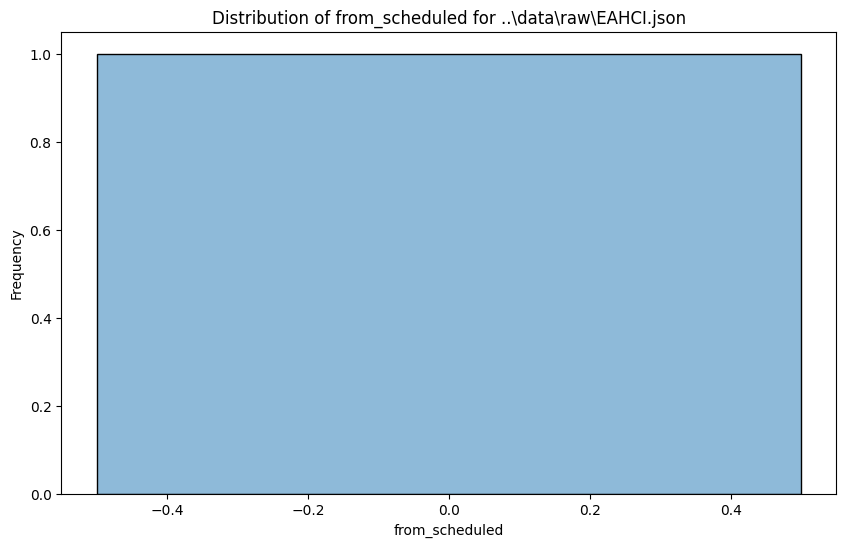

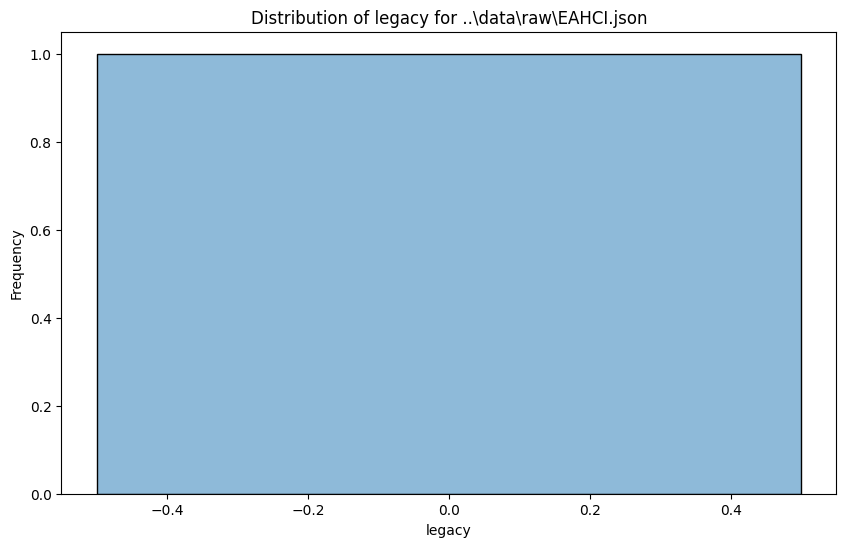

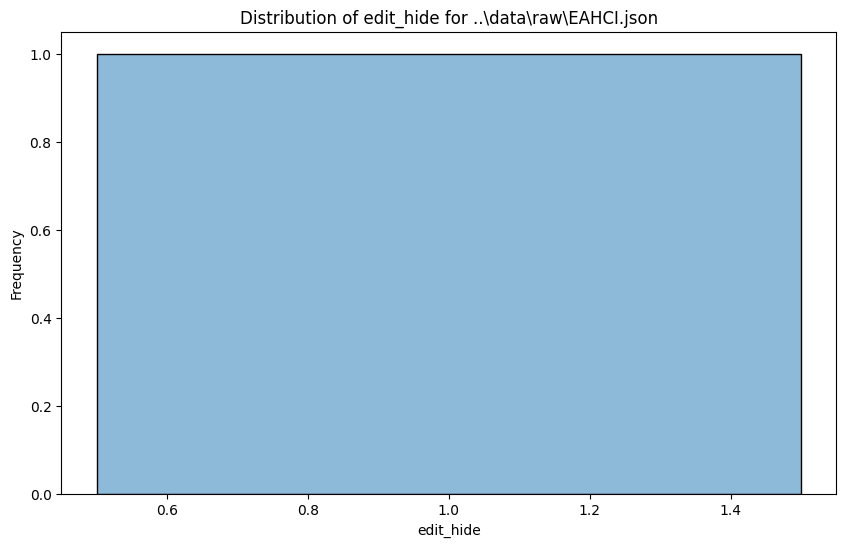

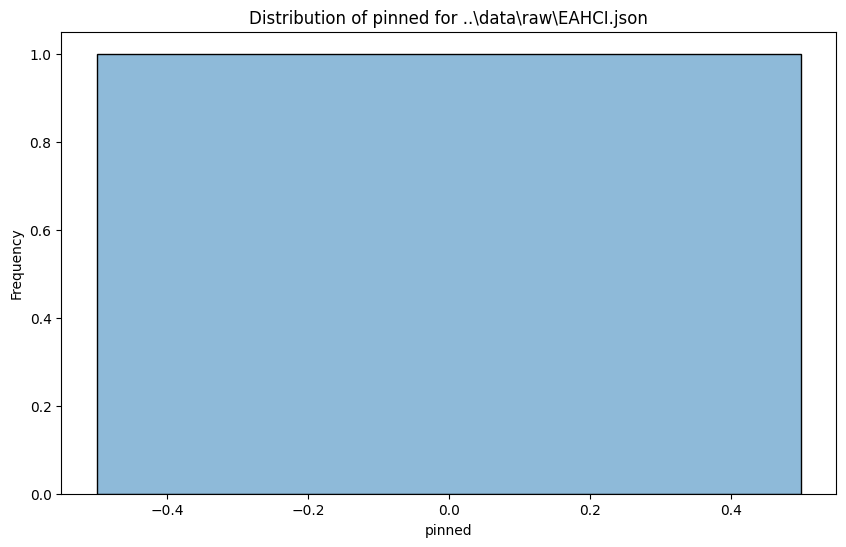

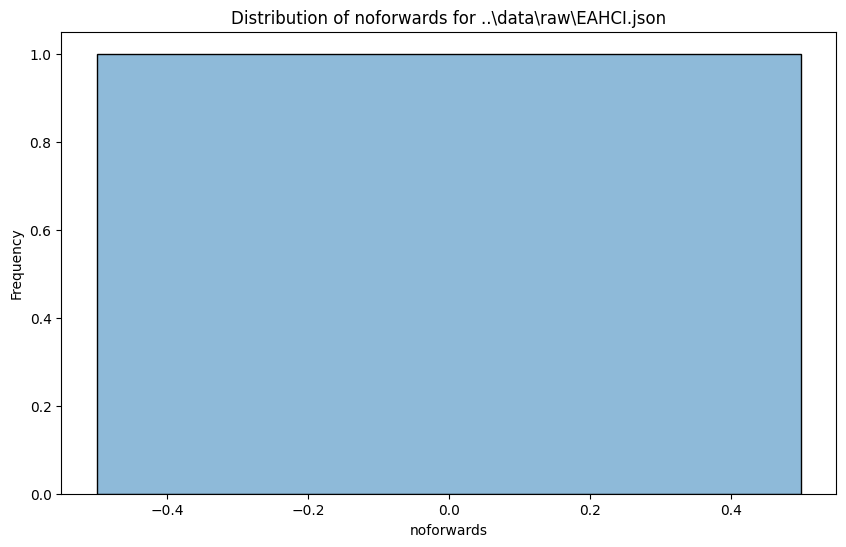

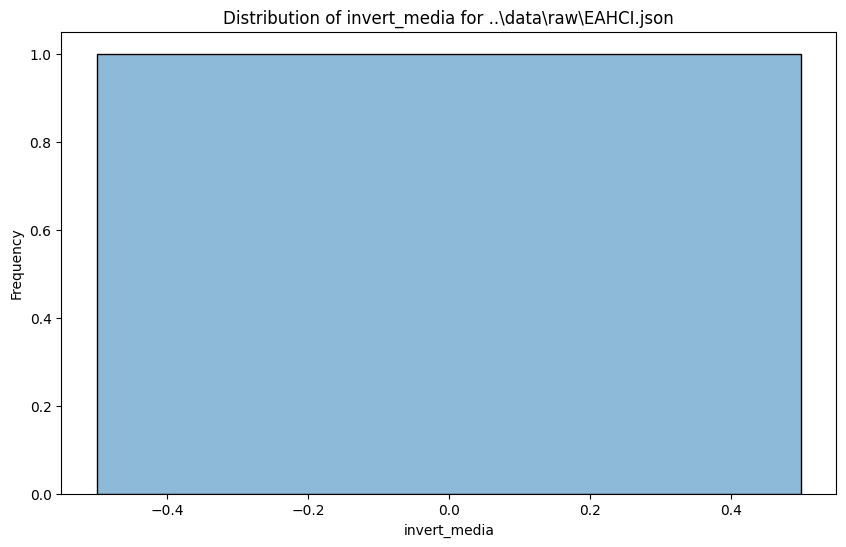

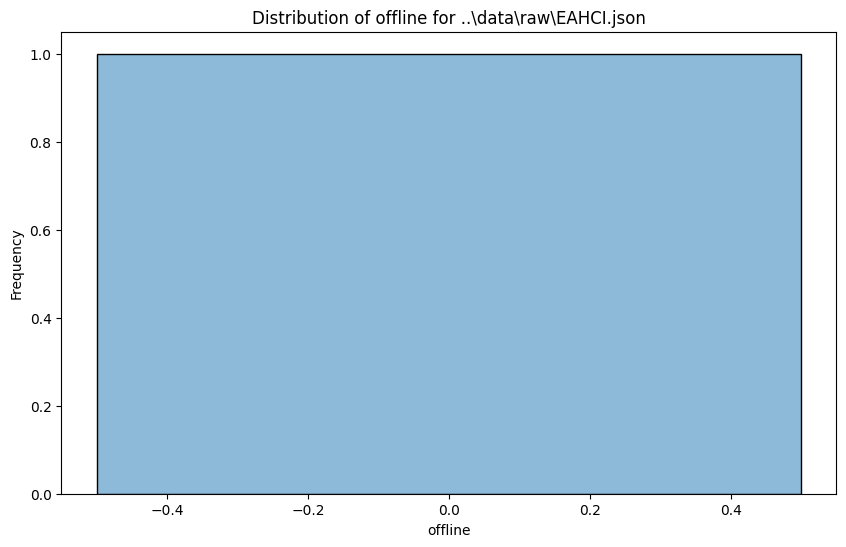

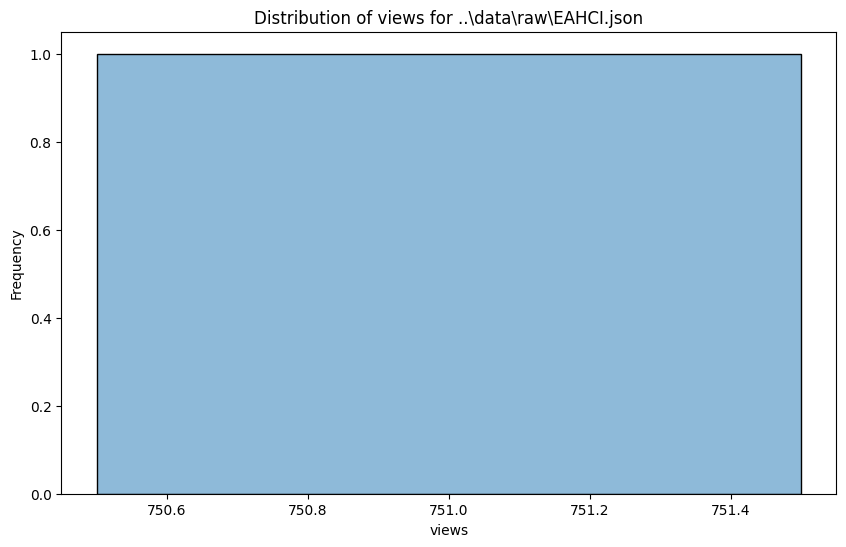

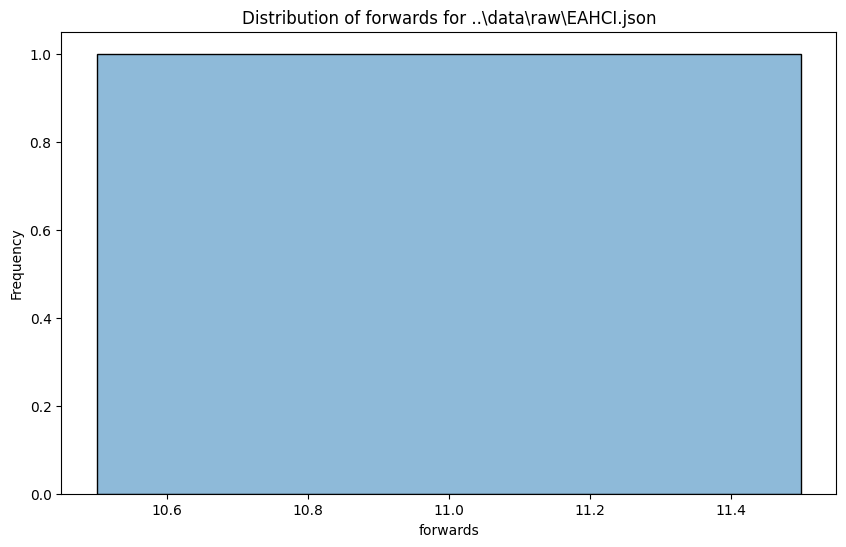

C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


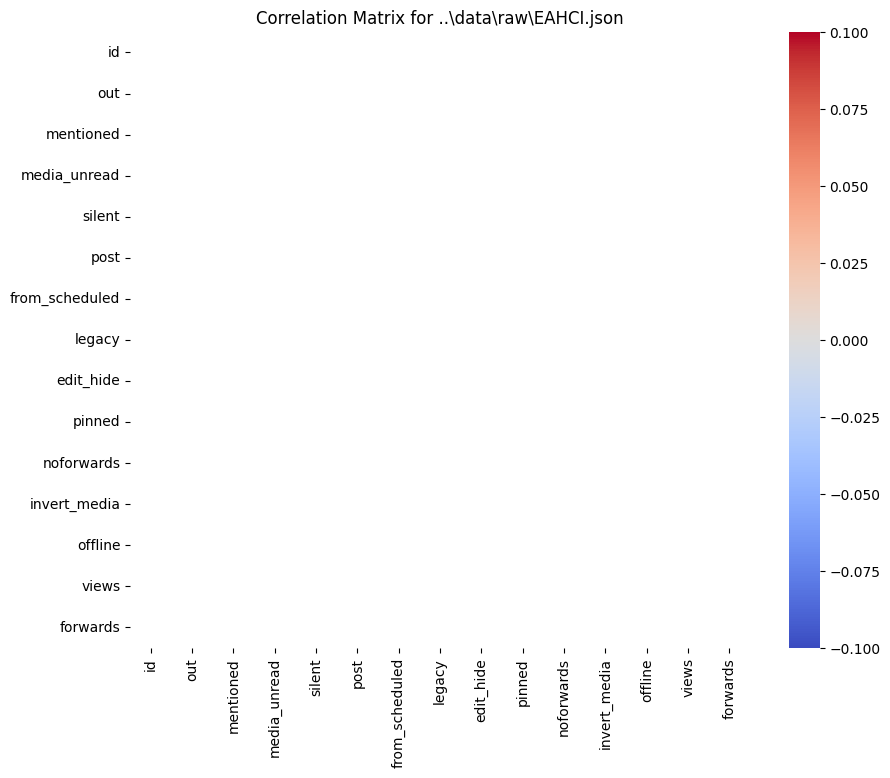

Data Information for ..\data\raw\yetenaweg.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _             1 non-null      object
 1   id            1 non-null      int64 
 2   peer_id       1 non-null      object
 3   date          1 non-null      object
 4   action        1 non-null      object
 5   out           1 non-null      bool  
 6   mentioned     1 non-null      bool  
 7   media_unread  1 non-null      bool  
 8   silent        1 non-null      bool  
 9   post          1 non-null      bool  
 10  legacy        1 non-null      bool  
 11  from_id       0 non-null      object
 12  reply_to      0 non-null      object
 13  ttl_period    0 non-null      object
dtypes: bool(6), int64(1), object(7)
memory usage: 202.0+ bytes

Summary Statistics for ..\data\raw\yetenaweg.json :


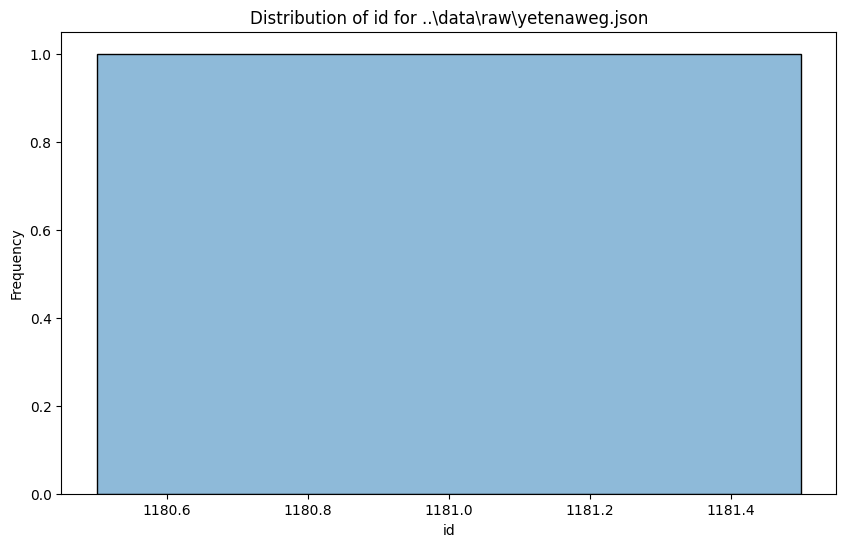

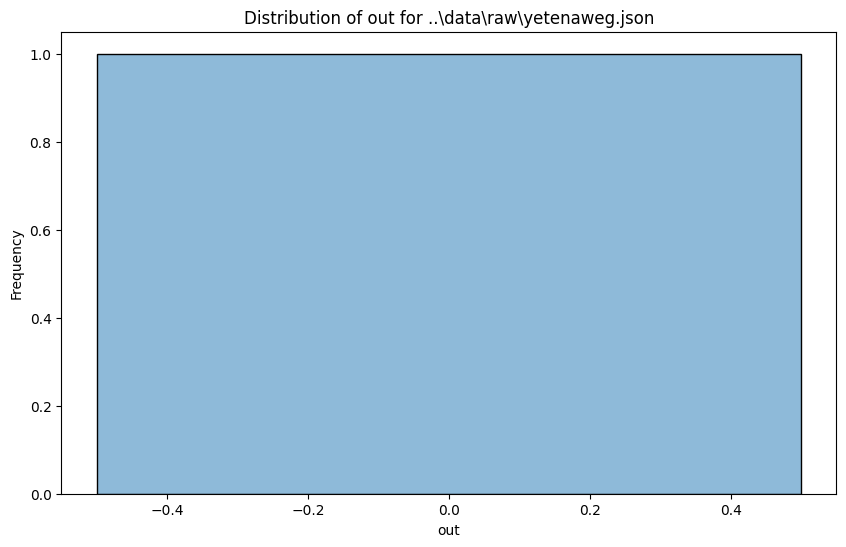

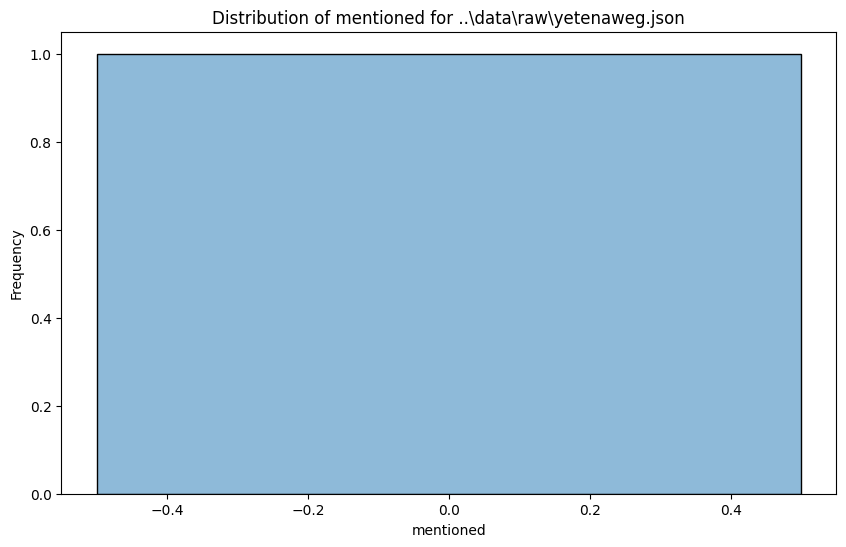

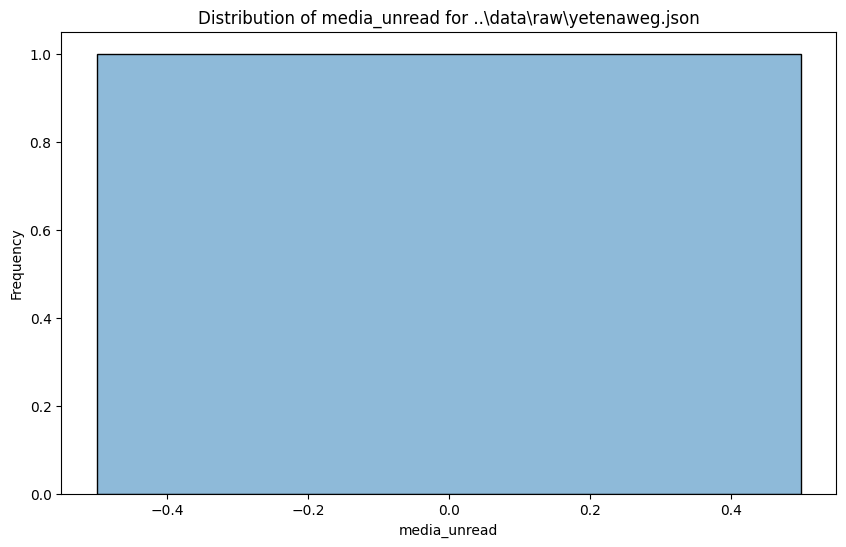

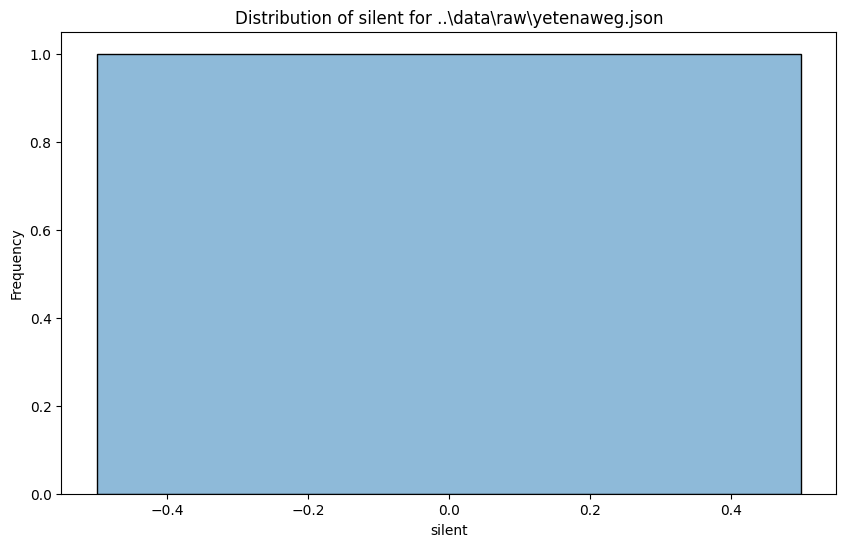

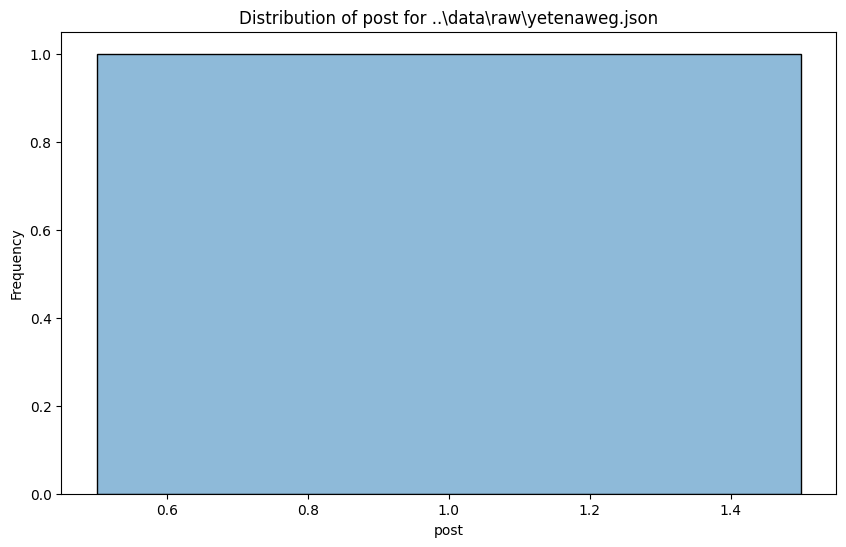

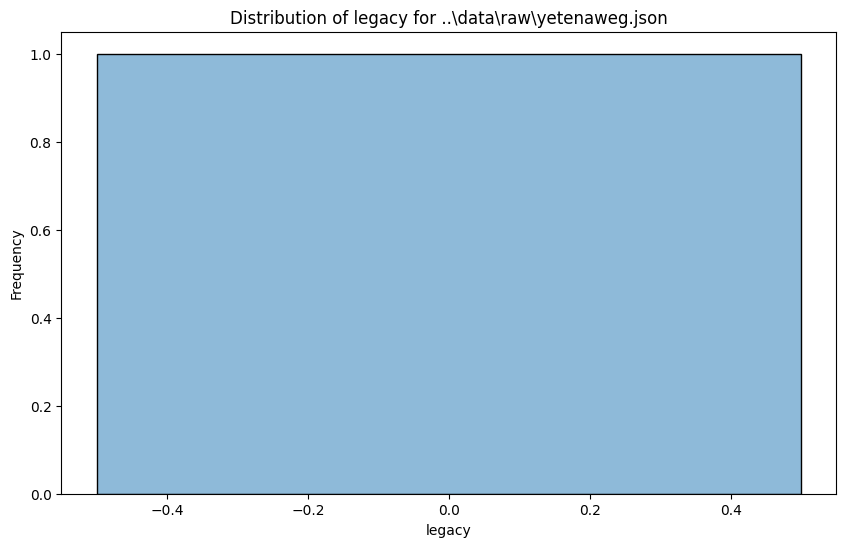

C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\1221\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


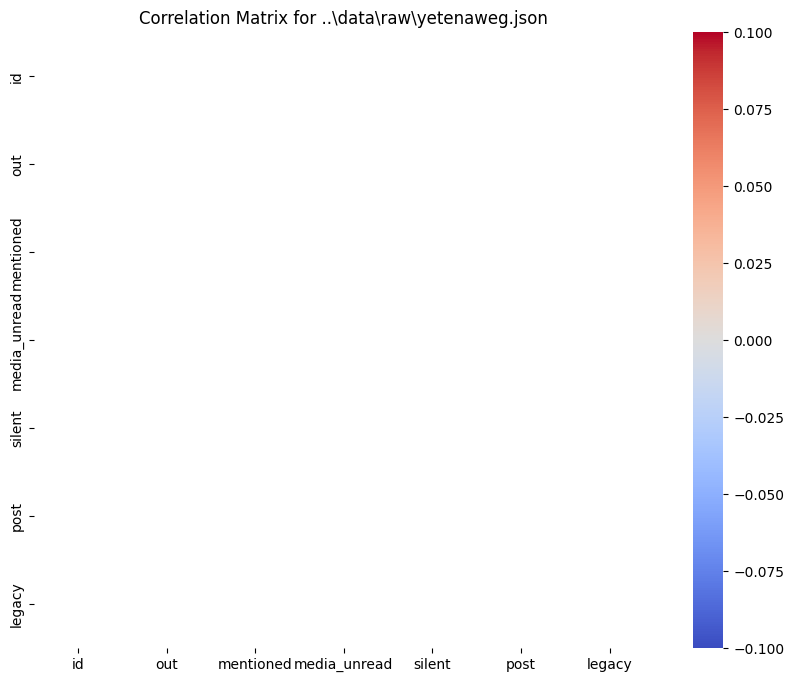

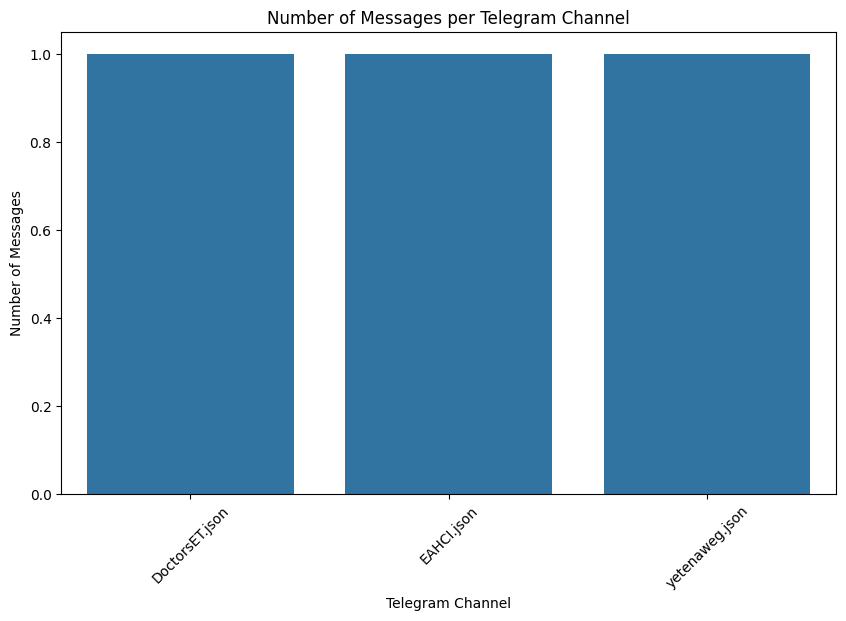

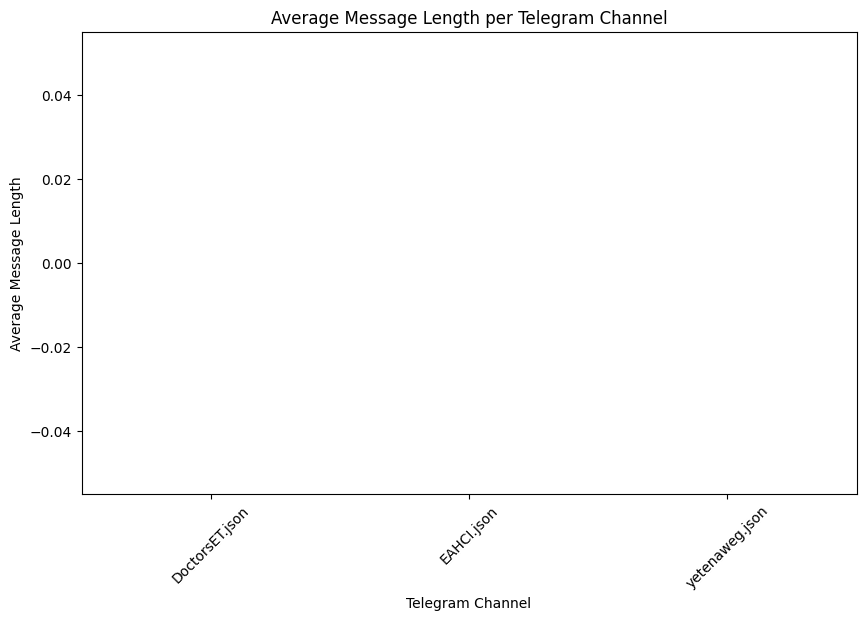

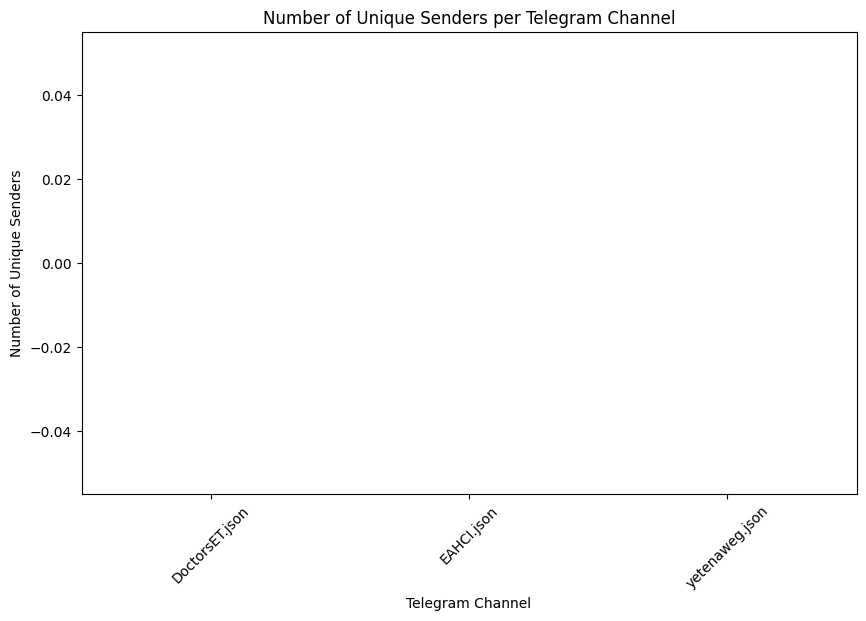

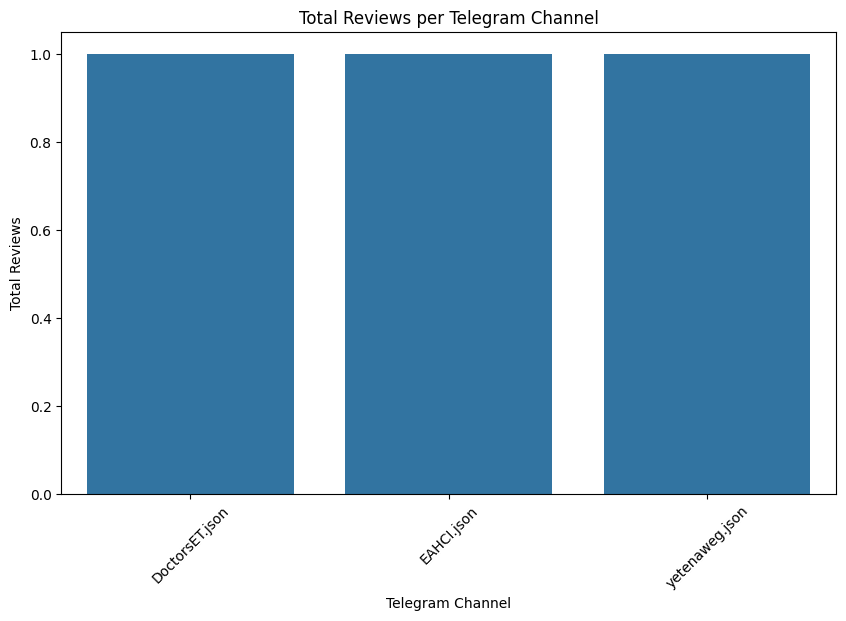

The Telegram channel with the most reviews is DoctorsET.json with 1 reviews.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Function to perform EDA on a JSON file
def perform_eda(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Display basic information about the dataset
    print("Data Information for", json_file, ":")
    df.info()

    # Summary statistics
    print("\nSummary Statistics for", json_file, ":")
    df.describe()

    # Distribution of numerical variables
    num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col} for {json_file}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Correlation matrix for numerical variables only
    if len(num_cols) > 1:
        numerical_df = df[num_cols]
        plt.figure(figsize=(10, 8))
        sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix for ' + json_file)
        plt.show()
    else:
        print("Insufficient numerical columns for correlation analysis in", json_file)

    return df

# Function to display sample images
def display_images(images, image_folder, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(min(num_images, len(images))):
        img = cv2.imread(os.path.join(image_folder, images[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, min(num_images, len(images)), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Function to compare channels and gather insights
def compare_channels(json_files):
    comparison_metrics = {}

    for file in json_files:
        df = perform_eda(file)
        channel_name = os.path.basename(file).split('_cleaned')[0]

        # Calculate metrics
        num_messages = len(df)
        avg_message_length = df['text'].str.len().mean() if 'text' in df.columns else 0
        num_unique_senders = df['sender_id'].nunique() if 'sender_id' in df.columns else 0
        total_reviews = df['review_count'].sum() if 'review_count' in df.columns else len(df)

        comparison_metrics[channel_name] = {
            'num_messages': num_messages,
            'avg_message_length': avg_message_length,
            'num_unique_senders': num_unique_senders,
            'total_reviews': total_reviews
        }

    return comparison_metrics

# Function to display insights
def display_insights(comparison_metrics):
    metrics_df = pd.DataFrame(comparison_metrics).T

    # Plot the number of messages per channel
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['num_messages'])
    plt.title('Number of Messages per Telegram Channel')
    plt.xlabel('Telegram Channel')
    plt.ylabel('Number of Messages')
    plt.xticks(rotation=45)
    plt.show()

    # Plot the average message length per channel
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['avg_message_length'])
    plt.title('Average Message Length per Telegram Channel')
    plt.xlabel('Telegram Channel')
    plt.ylabel('Average Message Length')
    plt.xticks(rotation=45)
    plt.show()

    # Plot the number of unique senders per channel
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['num_unique_senders'])
    plt.title('Number of Unique Senders per Telegram Channel')
    plt.xlabel('Telegram Channel')
    plt.ylabel('Number of Unique Senders')
    plt.xticks(rotation=45)
    plt.show()

    # Plot the total reviews per channel
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['total_reviews'])
    plt.title('Total Reviews per Telegram Channel')
    plt.xlabel('Telegram Channel')
    plt.ylabel('Total Reviews')
    plt.xticks(rotation=45)
    plt.show()

    # Print the channel with the most reviews
    most_reviews_channel = metrics_df['total_reviews'].idxmax()
    print(f'The Telegram channel with the most reviews is {most_reviews_channel} with {metrics_df.loc[most_reviews_channel, "total_reviews"]} reviews.')

# List of JSON files
json_files = ['..\\data\\raw\\DoctorsET.json', 
              '..\\data\\raw\\EAHCI.json', 
              '..\\data\\raw\\yetenaweg.json'
              ]

# Compare the channels and gather insights
comparison_metrics = compare_channels(json_files)

# Display the insights
display_insights(comparison_metrics)